In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [102]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [190]:
df = pd.read_csv(r'C:\Users\Mohammed Minhaj Arif\CRICKET\Cricket1.csv', encoding= 'unicode_escape') 
df.head()

Player       Span  Mat  Inns  NO   Runs    HS    Ave     BF  \
0       V Kohli (INDIA)  2008-2022  249   245  37  12195   183  58.62  13084   
1     RG Sharma (INDIA)  2007-2023  220   216  30   9167   264  49.28  10295   
2      LRPL Taylor (NZ)  2006-2021  218   209  36   8394  181*  48.52  10065   
3          HM Amla (SA)  2008-2019  175   173  12   8079   159  50.18   9128   
4  EJG Morgan (ENG/IRE)  2006-2021  235   225  31   7645   148  39.40   8367   

      SR  100  50   0  
0  93.20   43  63  14  
1  89.04   29  43  12  
2  83.39   21  50   9  
3  88.50   27  39   4  
4  91.37   14  47  16

df = pd.read_csv(r'C:\Users\Mohammed Minhaj Arif\CRICKET\Cricket1.csv', encoding= 'unicode_escape')
df.head()

In [104]:
df.shape

(115, 13)

In [105]:
df_dub = df.copy()
df_dub.drop_duplicates(subset=None, inplace=True)

In [106]:
df_dub.shape

(115, 13)

In [107]:
df.shape

(115, 13)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  115 non-null    object 
 1   Span    115 non-null    object 
 2   Mat     115 non-null    int64  
 3   Inns    115 non-null    int64  
 4   NO      115 non-null    int64  
 5   Runs    115 non-null    int64  
 6   HS      115 non-null    object 
 7   Ave     115 non-null    float64
 8   BF      115 non-null    int64  
 9   SR      115 non-null    float64
 10  100     115 non-null    int64  
 11  50      115 non-null    int64  
 12  0       115 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 11.8+ KB


In [109]:
(df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

0.0    13
dtype: int64

In [110]:
df.isnull().sum().value_counts(ascending=False)

0    13
dtype: int64

In [111]:
(df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

0.0    115
dtype: int64

In [112]:
df.isnull().sum(axis=1).value_counts(ascending=False)

0    115
dtype: int64

In [113]:
df.head()




Player       Span  Mat  Inns  NO   Runs    HS    Ave     BF  \
0       V Kohli (INDIA)  2008-2022  249   245  37  12195   183  58.62  13084   
1     RG Sharma (INDIA)  2007-2023  220   216  30   9167   264  49.28  10295   
2      LRPL Taylor (NZ)  2006-2021  218   209  36   8394  181*  48.52  10065   
3          HM Amla (SA)  2008-2019  175   173  12   8079   159  50.18   9128   
4  EJG Morgan (ENG/IRE)  2006-2021  235   225  31   7645   148  39.40   8367   

      SR  100  50   0  
0  93.20   43  63  14  
1  89.04   29  43  12  
2  83.39   21  50   9  
3  88.50   27  39   4  
4  91.37   14  47  16

In [114]:
df[['Strt','End']] = df.Span.str.split("-",expand=True) 


In [115]:
df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df=df.drop(['Strt','End','Span'], axis = 1) 
df.head()

Player  Mat  Inns  NO   Runs    HS    Ave     BF     SR  100  \
0       V Kohli (INDIA)  249   245  37  12195   183  58.62  13084  93.20   43   
1     RG Sharma (INDIA)  220   216  30   9167   264  49.28  10295  89.04   29   
2      LRPL Taylor (NZ)  218   209  36   8394  181*  48.52  10065  83.39   21   
3          HM Amla (SA)  175   173  12   8079   159  50.18   9128  88.50   27   
4  EJG Morgan (ENG/IRE)  235   225  31   7645   148  39.40   8367  91.37   14   

   50   0  Exp  
0  63  14   14  
1  43  12   16  
2  50   9   15  
3  39   4   11  
4  47  16   15

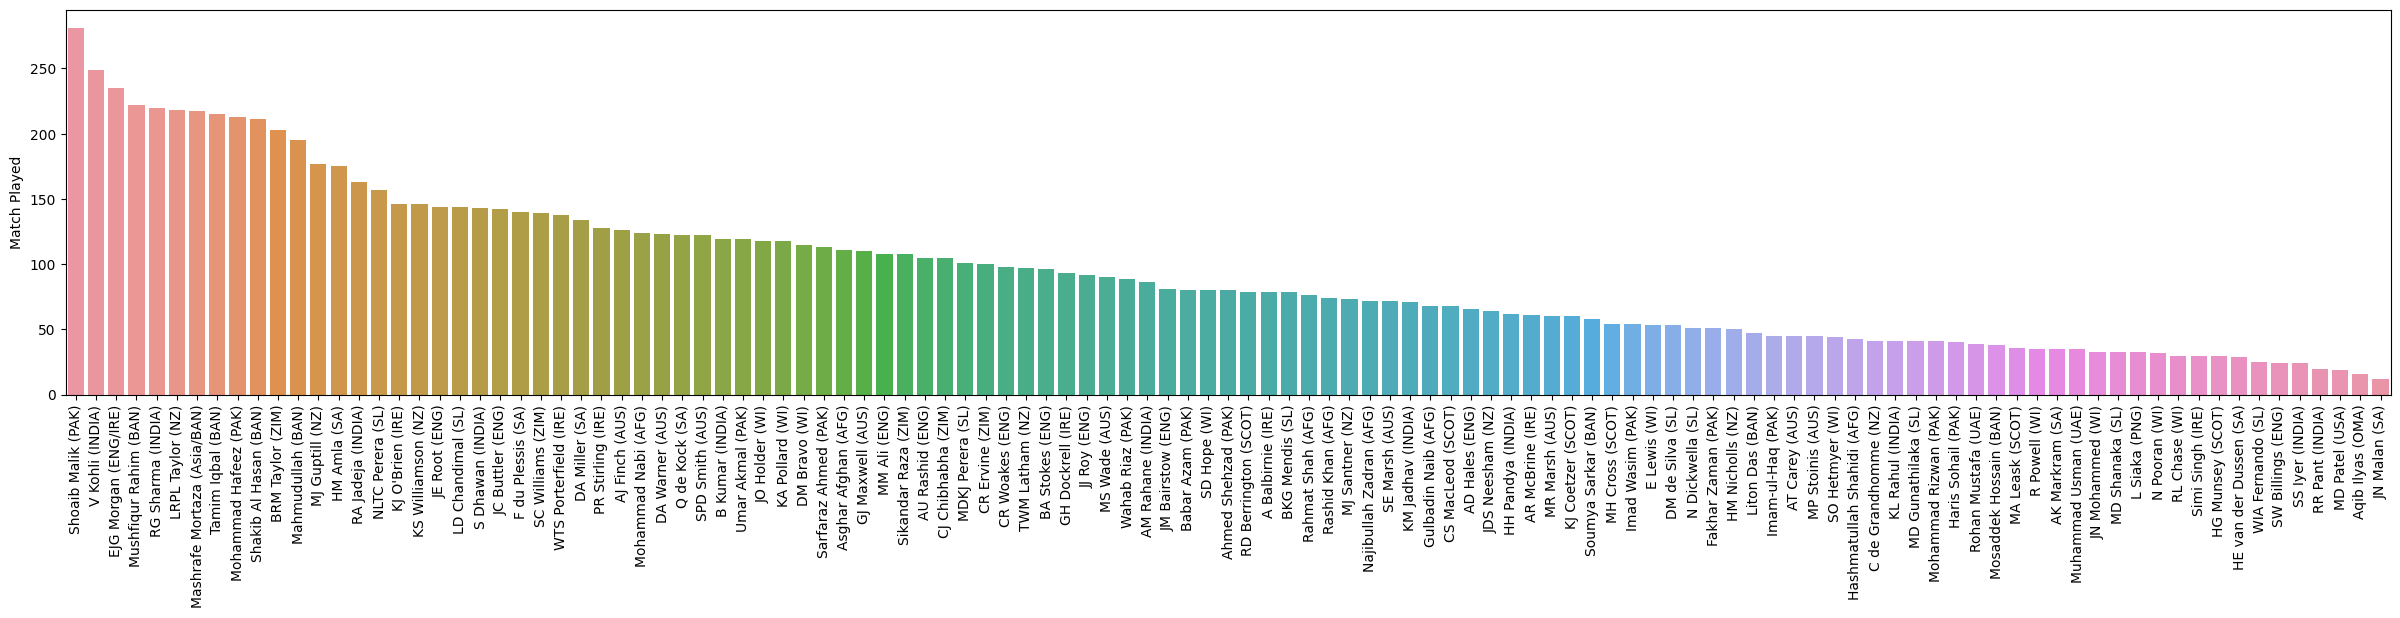

In [116]:
#Match Played
plt.figure(figsize = (30,5))
mat = df[['Player','Mat']].sort_values('Mat', ascending = False)
ax = sns.barplot(x='Player', y='Mat', data= mat)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

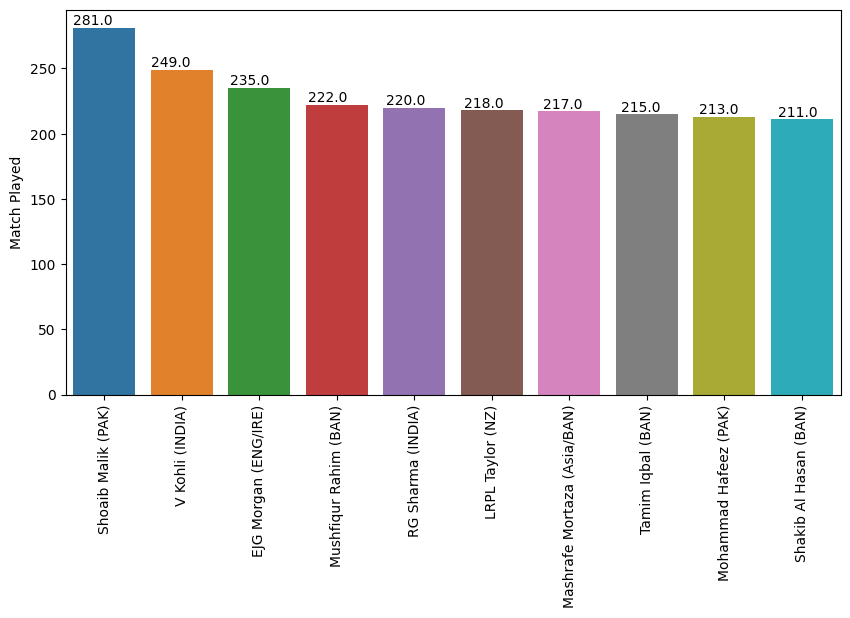

In [117]:
plt.figure(figsize = (10,5))
mat_top10 = df[['Player','Mat']].sort_values('Mat', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Mat', data= mat_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

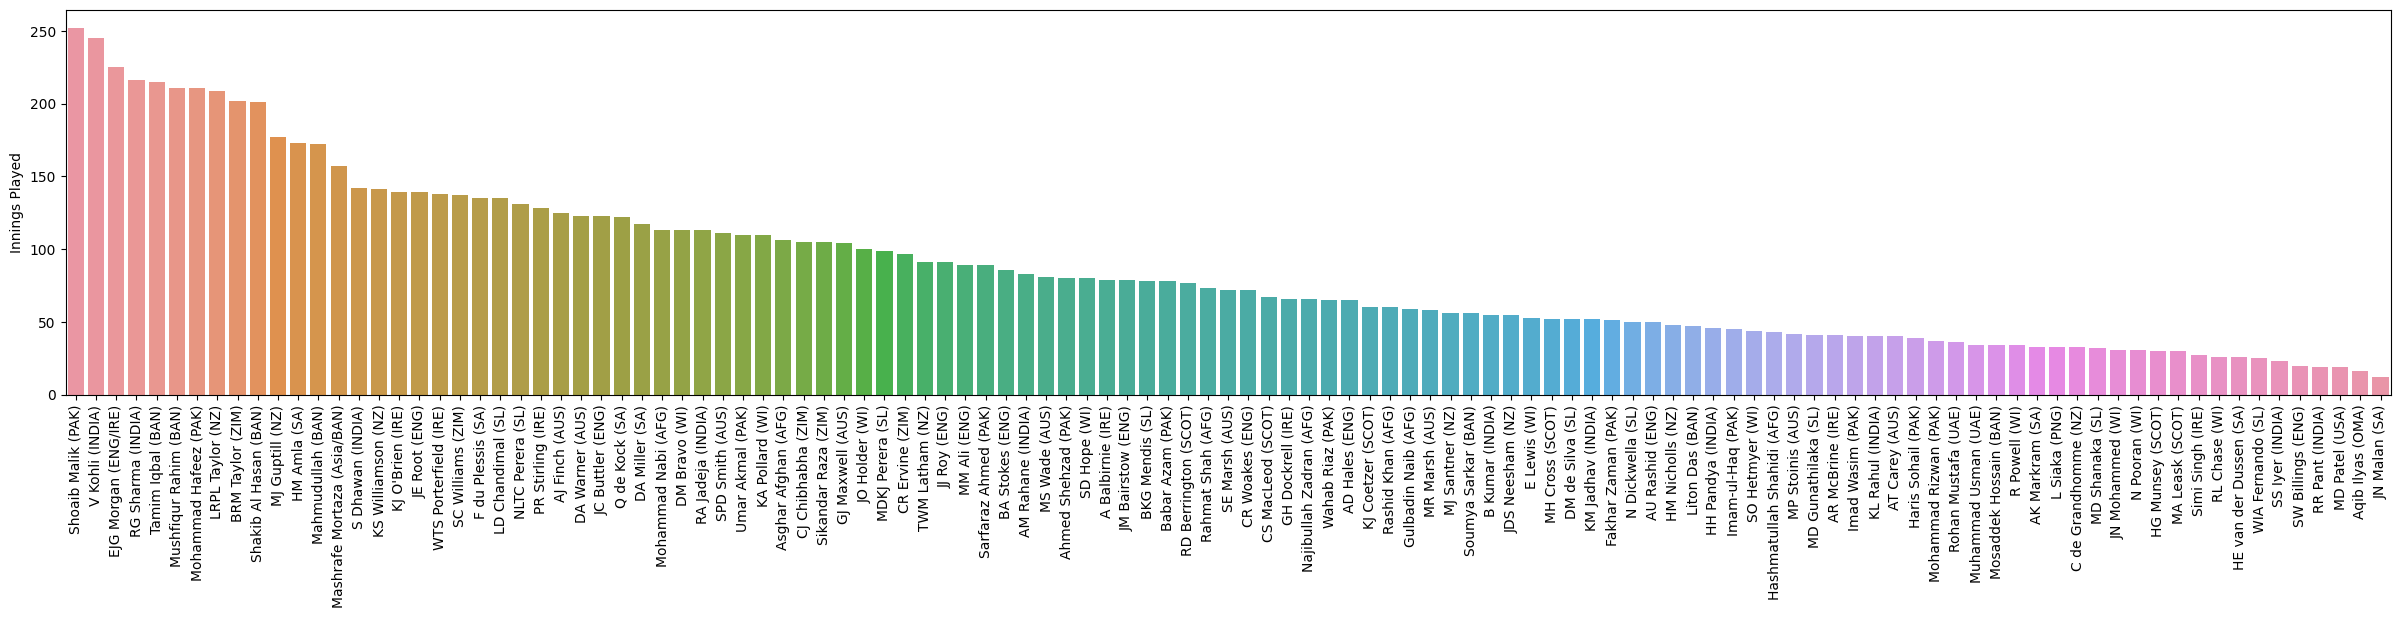

In [118]:
#Inns
plt.figure(figsize = (30,5))
inns = df[['Player','Inns']].sort_values('Inns', ascending = False)
ax = sns.barplot(x='Player', y='Inns', data= inns)
ax.set(xlabel = '', ylabel= 'Innings Played')
plt.xticks(rotation=90)
plt.show()

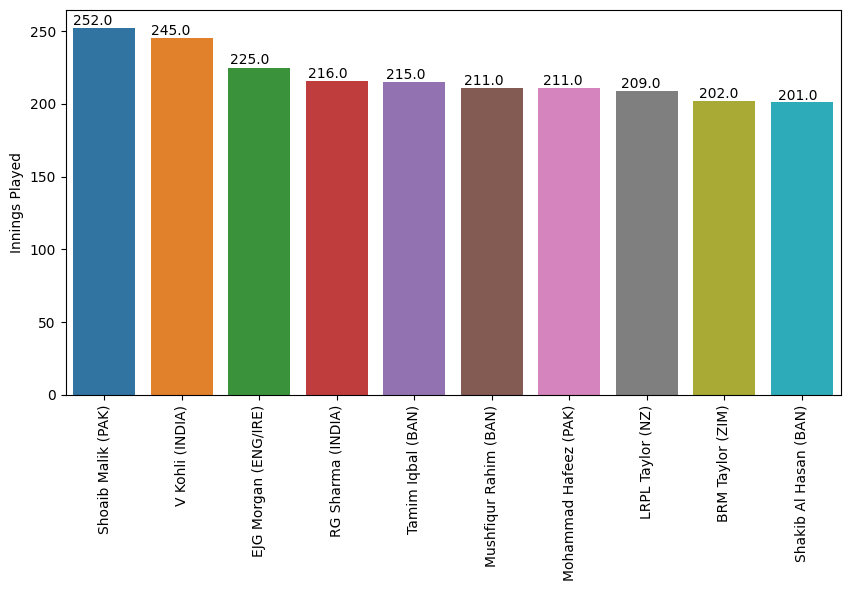

In [119]:
plt.figure(figsize = (10,5))
inns_top10 = df[['Player','Inns']].sort_values('Inns', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Inns', data= inns_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Innings Played')
plt.xticks(rotation=90)
plt.show()

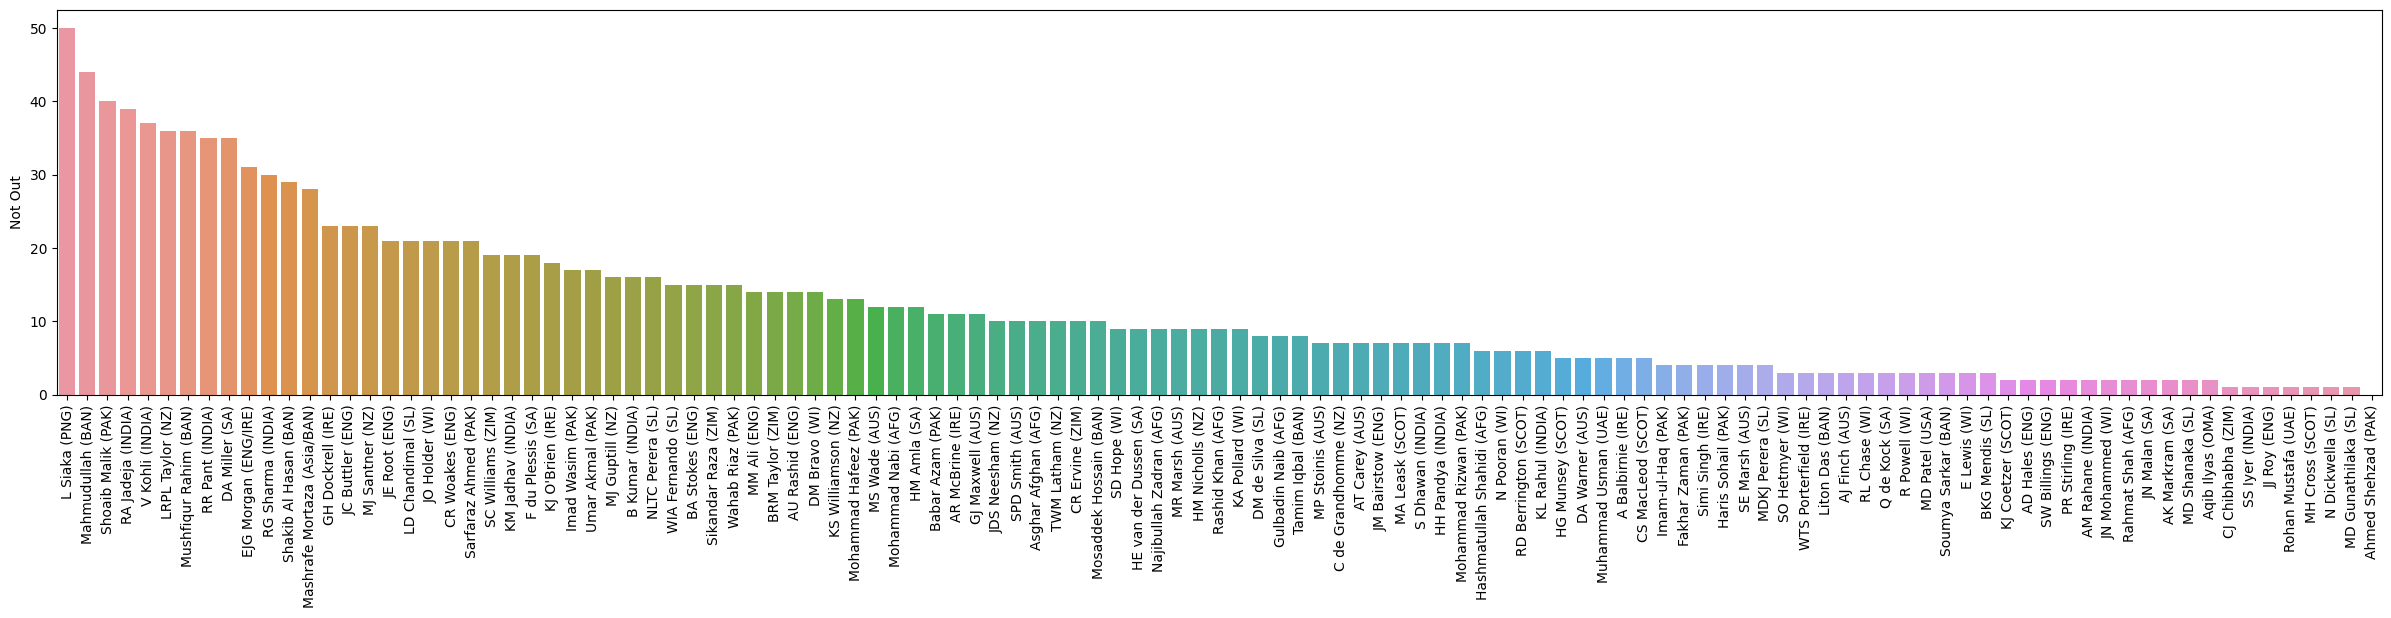

In [120]:
#NO
plt.figure(figsize = (30,5))
no = df[['Player','NO']].sort_values('NO', ascending = False)
ax = sns.barplot(x='Player', y='NO', data= no)
ax.set(xlabel = '', ylabel= 'Not Out')
plt.xticks(rotation=90)
plt.show()

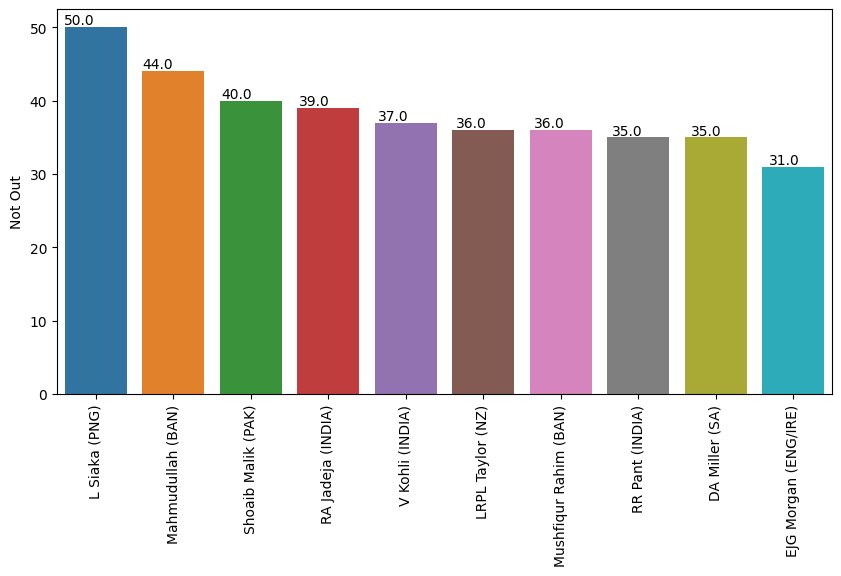

In [121]:
plt.figure(figsize = (10,5))
inns_top10 = df[['Player','NO']].sort_values('NO', ascending = False).head(10)
ax = sns.barplot(x='Player', y='NO', data= inns_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Not Out')
plt.xticks(rotation=90)
plt.show()

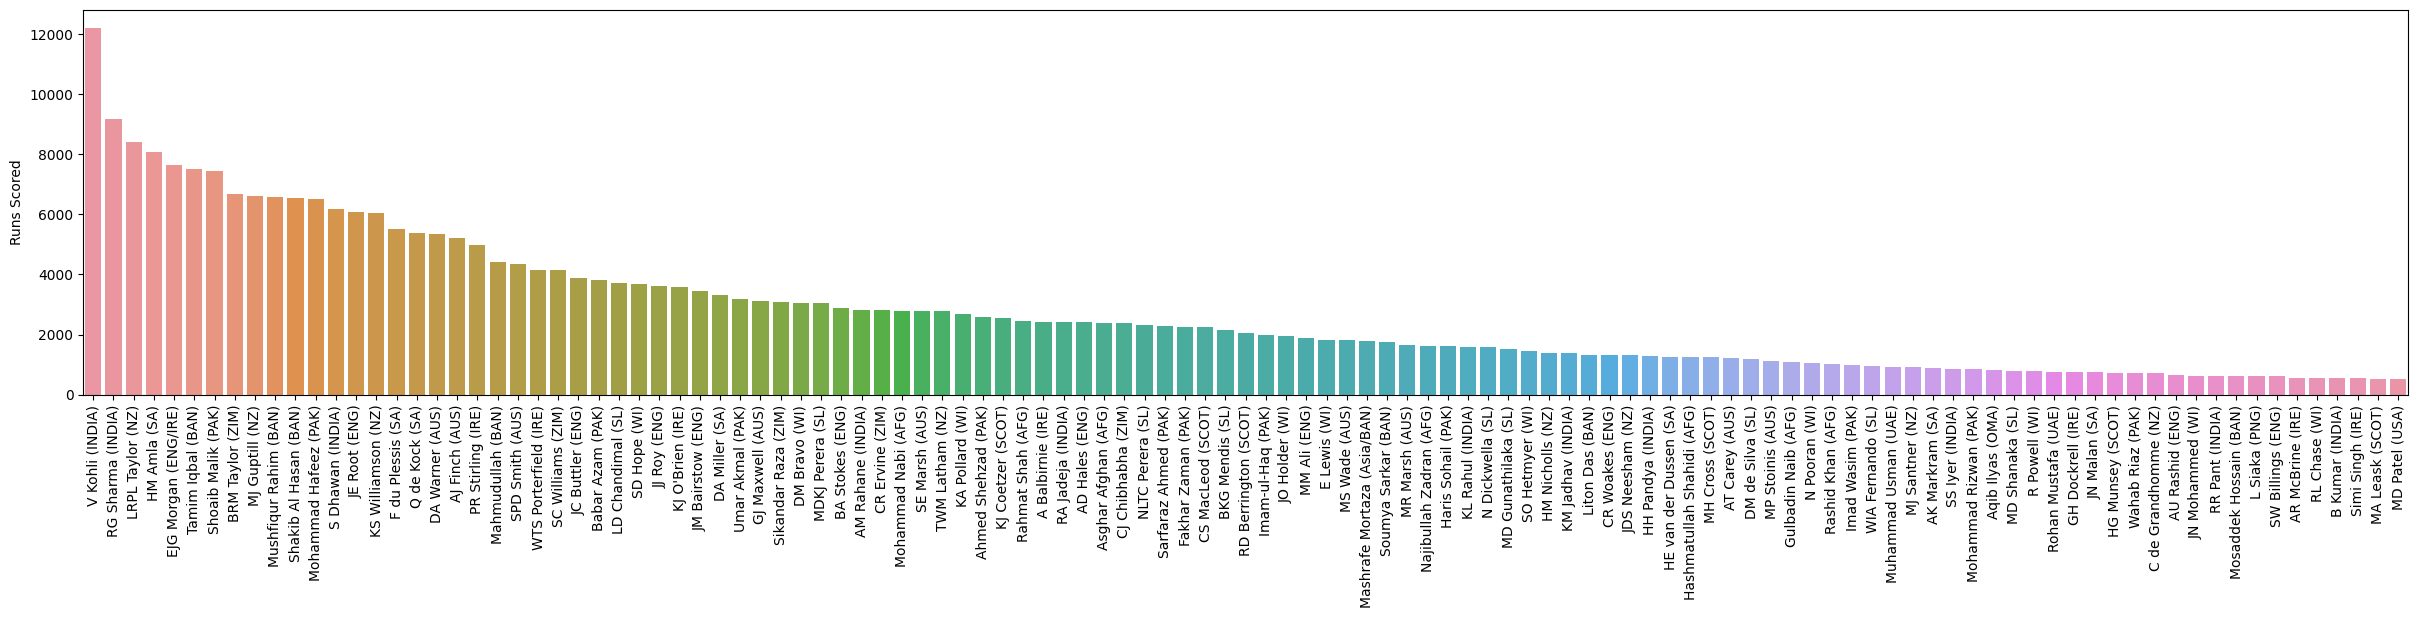

In [122]:
#Runs
plt.figure(figsize = (30,5))
run = df[['Player','Runs']].sort_values('Runs', ascending = False)
ax = sns.barplot(x='Player', y='Runs', data= run)
ax.set(xlabel = '', ylabel= 'Runs Scored')
plt.xticks(rotation=90)
plt.show()

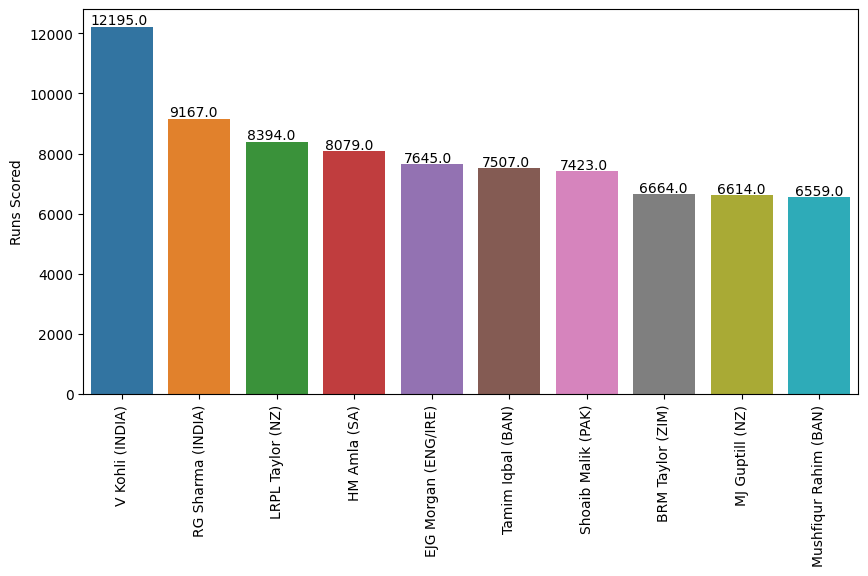

In [123]:
plt.figure(figsize = (10,5))
runs_top10 = df[['Player','Runs']].sort_values('Runs', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Runs', data= runs_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Runs Scored')
plt.xticks(rotation=90)
plt.show()


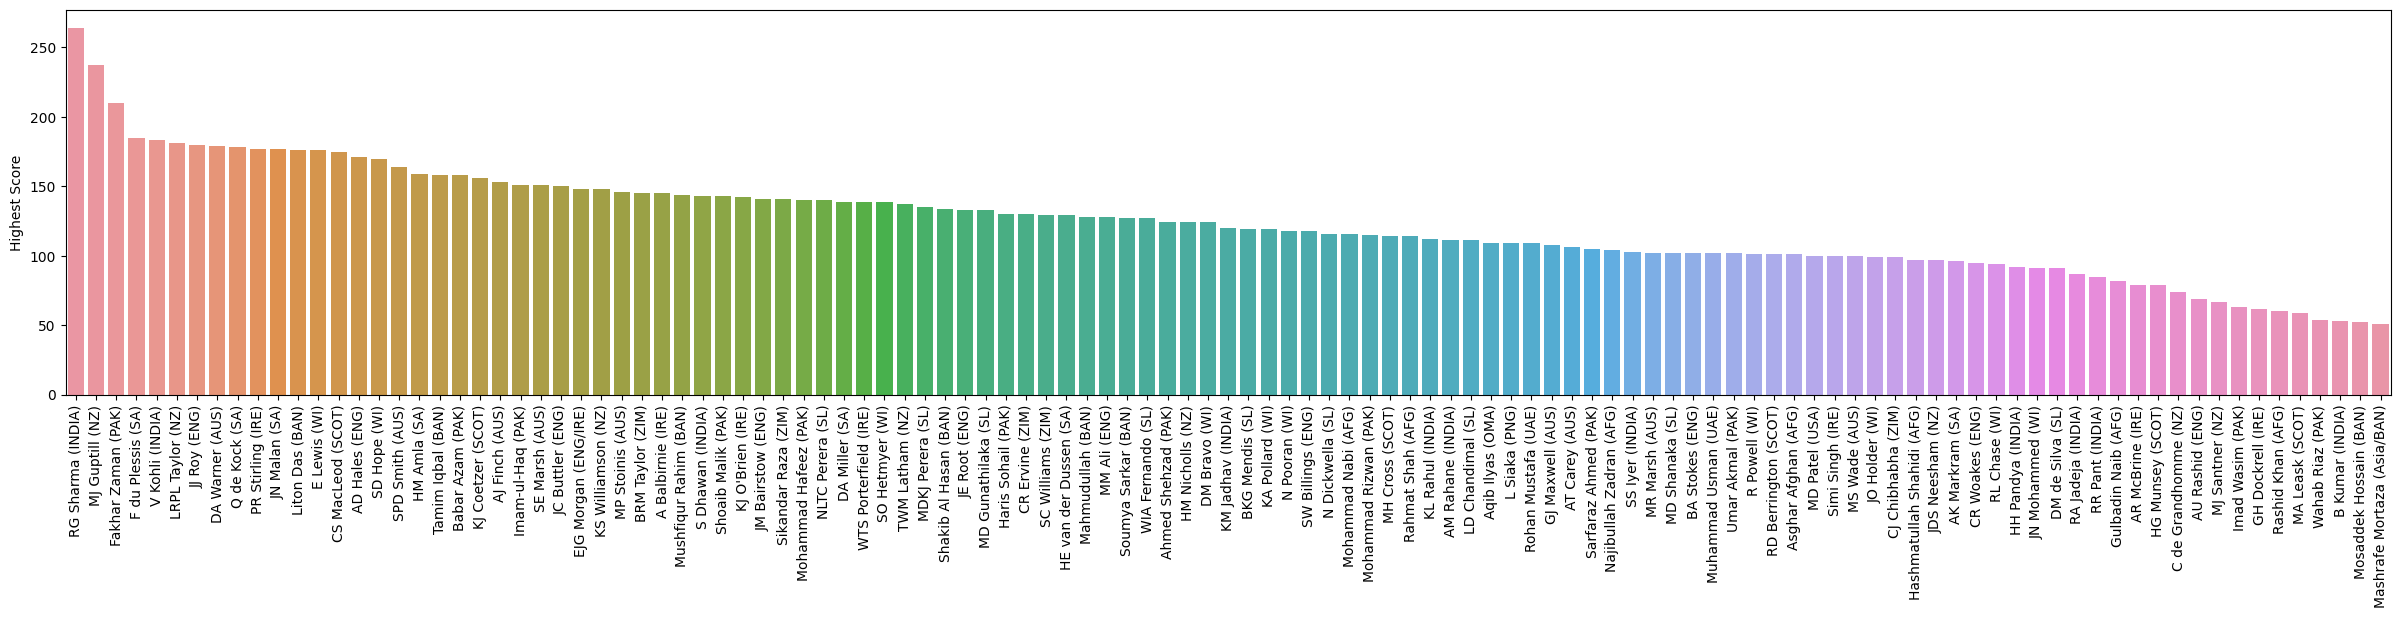

In [124]:
#HS
df.HS=df.HS.str.extract('(\d+)')
df.HS=df.HS.astype(int)
plt.figure(figsize = (30,5))
hs = df[['Player','HS']].sort_values('HS', ascending = False)
ax = sns.barplot(x='Player', y='HS', data= hs)
ax.set(xlabel = '', ylabel= 'Highest Score')
plt.xticks(rotation=90)
plt.show()

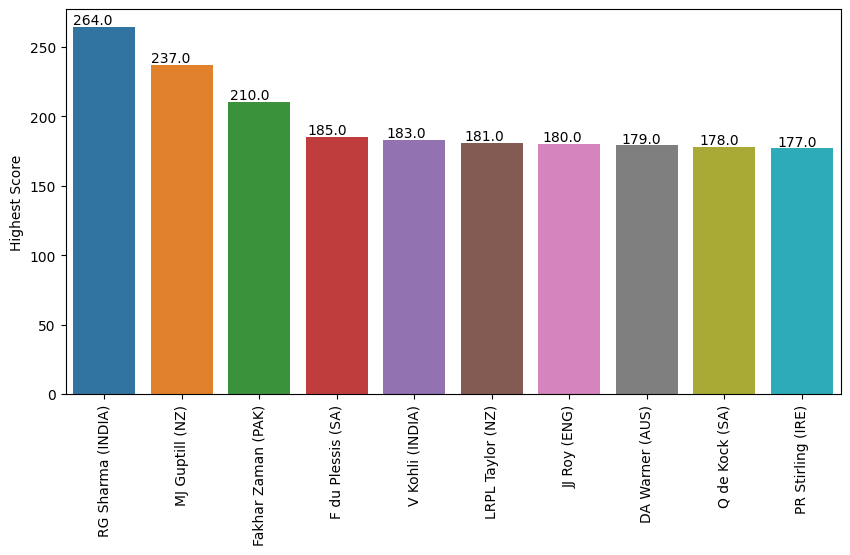

In [125]:
plt.figure(figsize = (10,5))
hs_top10 = df[['Player','HS']].sort_values('HS', ascending = False).head(10)
ax = sns.barplot(x='Player', y='HS', data= hs_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Highest Score')
plt.xticks(rotation=90)
plt.show()

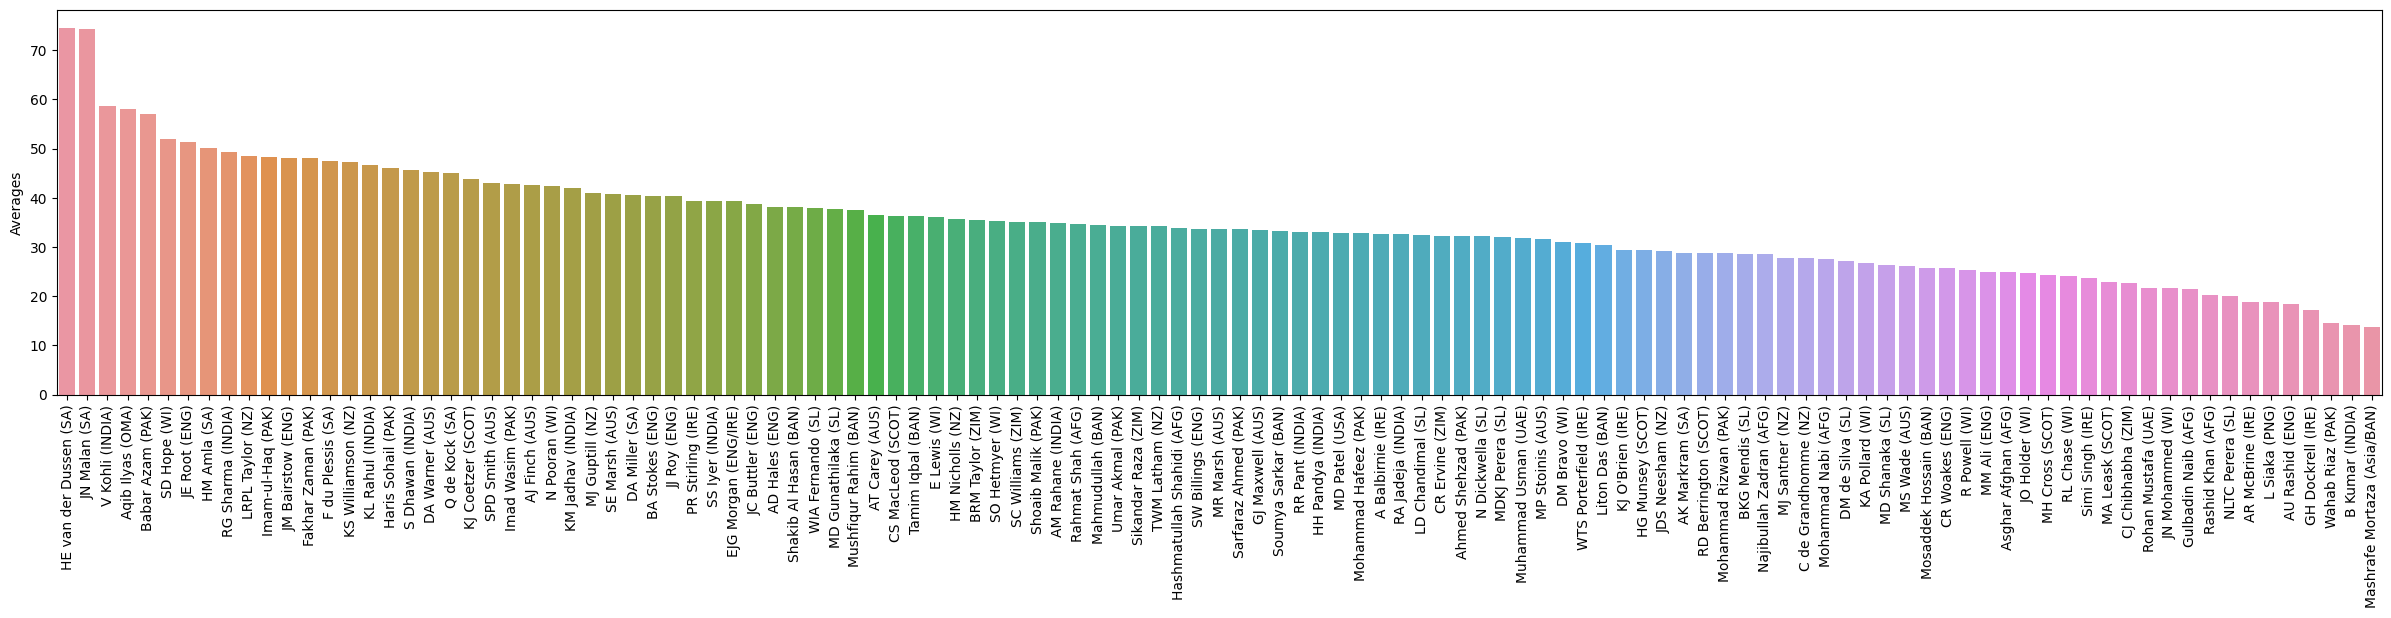

In [126]:
#Ave
plt.figure(figsize = (30,5))
ave = df[['Player','Ave']].sort_values('Ave', ascending = False)
ax = sns.barplot(x='Player', y='Ave', data= ave)
ax.set(xlabel = '', ylabel= 'Averages')
plt.xticks(rotation=90)
plt.show()

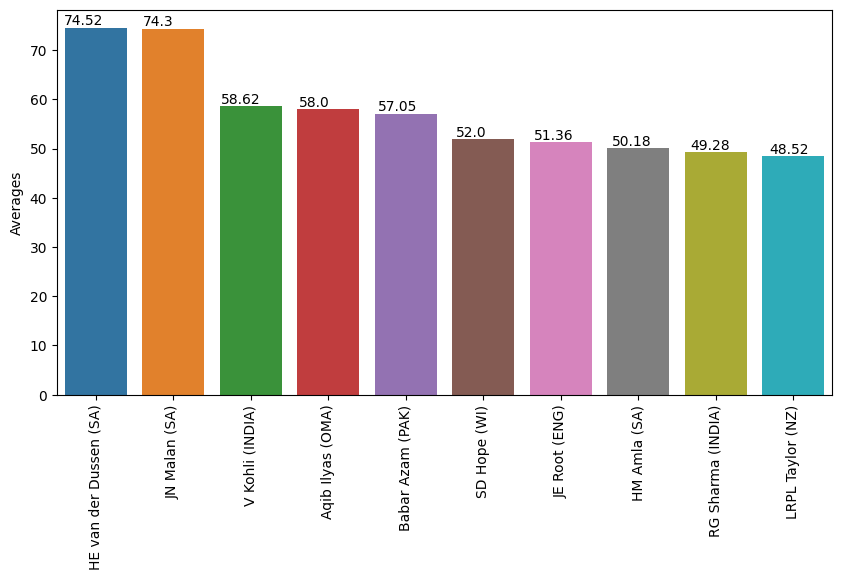

In [127]:
plt.figure(figsize = (10,5))
avg_top10 = df[['Player','Ave']].sort_values('Ave', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Ave', data= avg_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Averages')
plt.xticks(rotation=90)
plt.show()

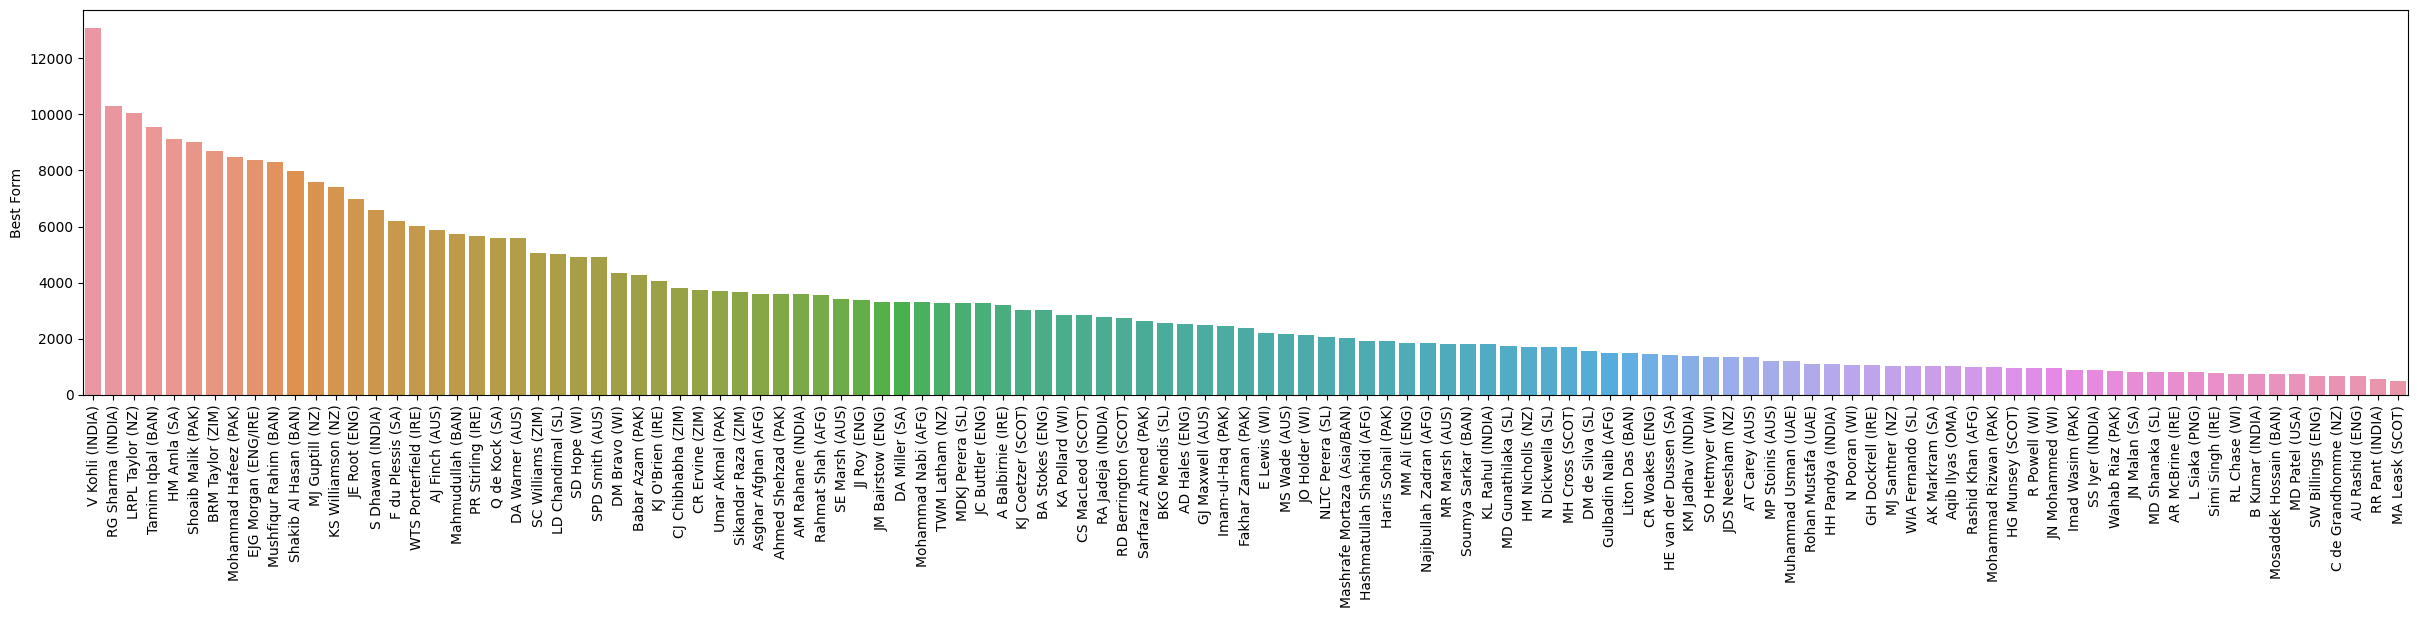

In [128]:
#BF
plt.figure(figsize = (30,5))
bf = df[['Player','BF']].sort_values('BF', ascending = False)
ax = sns.barplot(x='Player', y='BF', data= bf)
ax.set(xlabel = '', ylabel= 'Best Form')
plt.xticks(rotation=90)
plt.show()

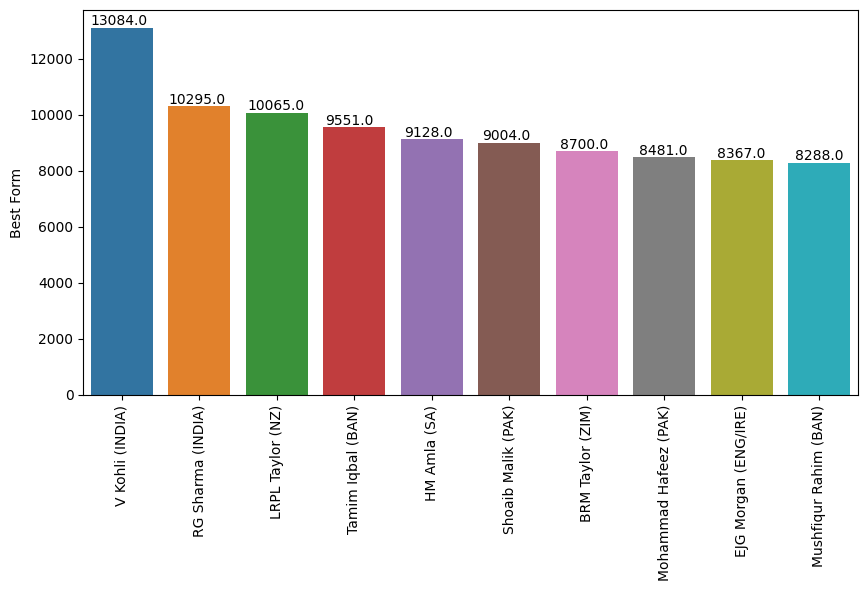

In [129]:
plt.figure(figsize = (10,5))
bf_top10 = df[['Player','BF']].sort_values('BF', ascending = False).head(10)
ax = sns.barplot(x='Player', y='BF', data= bf_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Best Form')
plt.xticks(rotation=90)
plt.show()

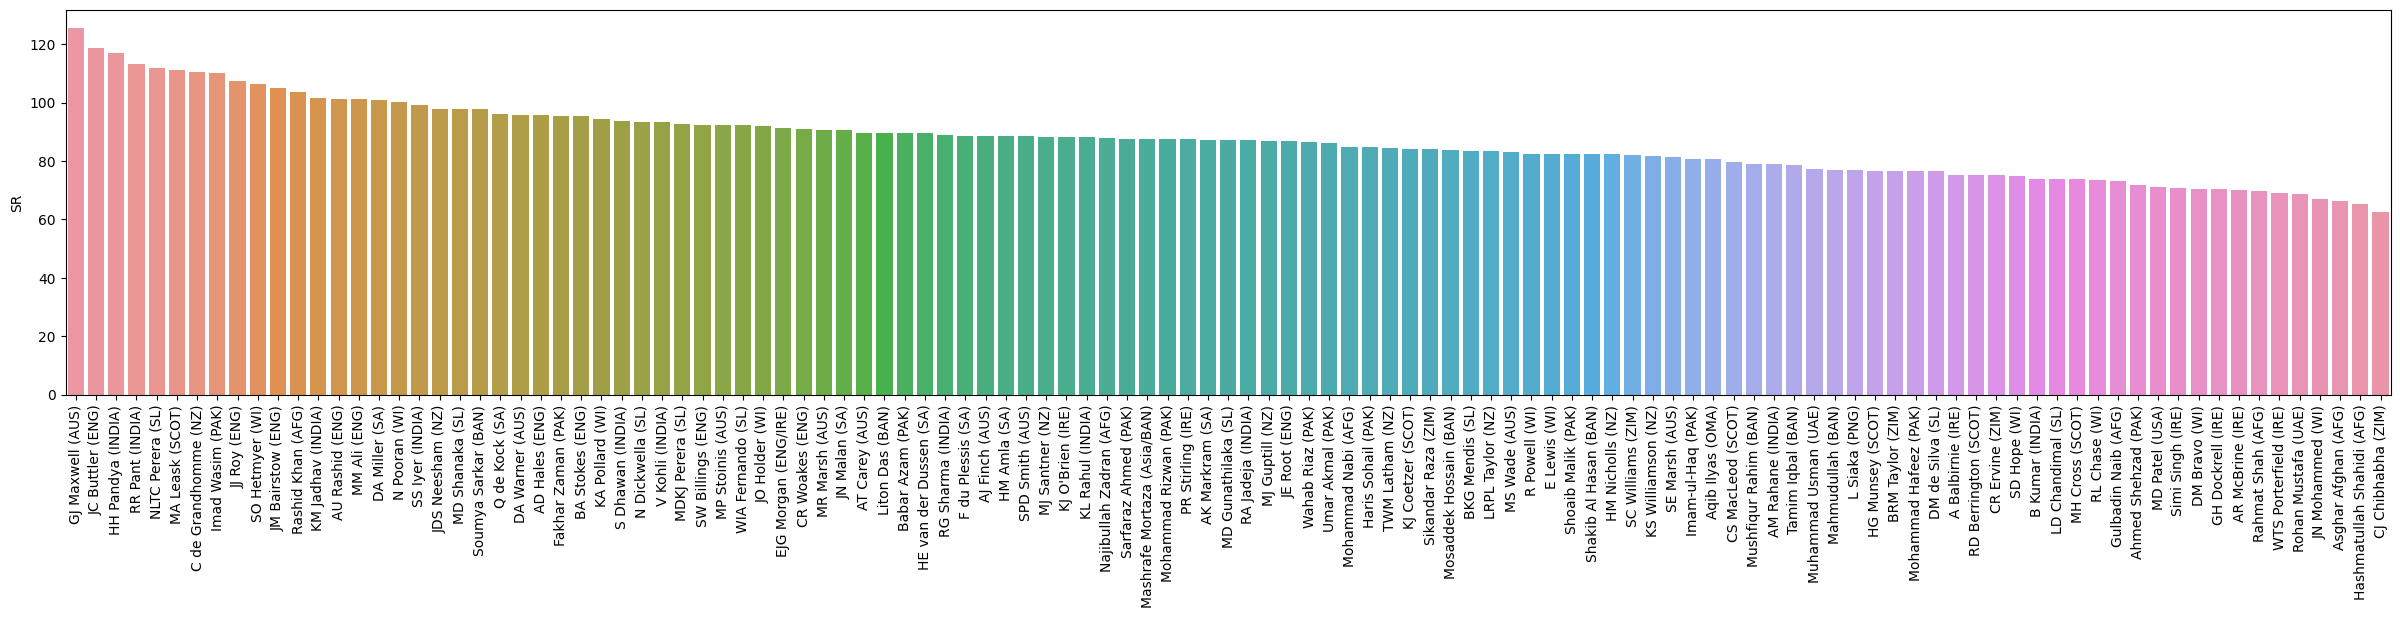

In [130]:
#SR 
plt.figure(figsize = (30,5))
sr = df[['Player','SR']].sort_values('SR', ascending = False)
ax = sns.barplot(x='Player', y='SR', data= sr)
ax.set(xlabel = '', ylabel= 'SR')
plt.xticks(rotation=90)
plt.show()


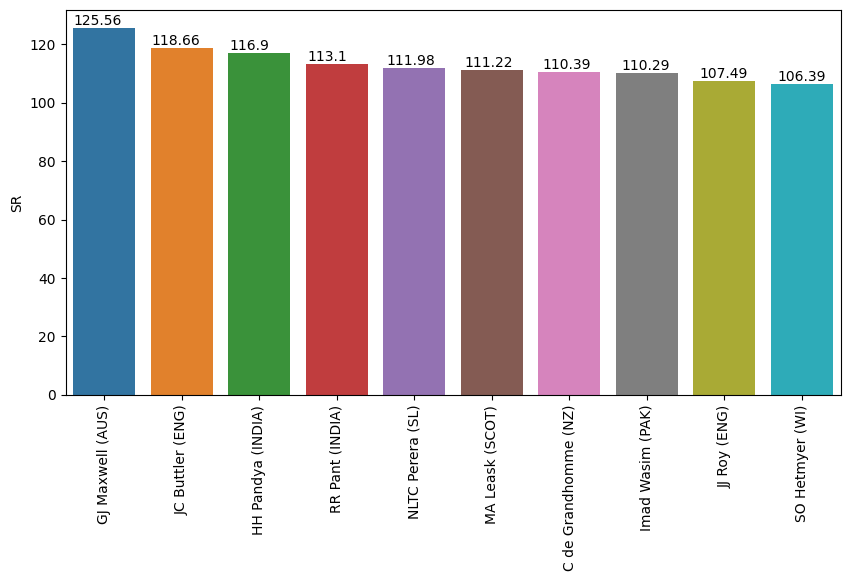

In [131]:
plt.figure(figsize = (10,5))
sr_top10 = df[['Player','SR']].sort_values('SR', ascending = False).head(10)
ax = sns.barplot(x='Player', y='SR', data= sr_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'SR')
plt.xticks(rotation=90)
plt.show()

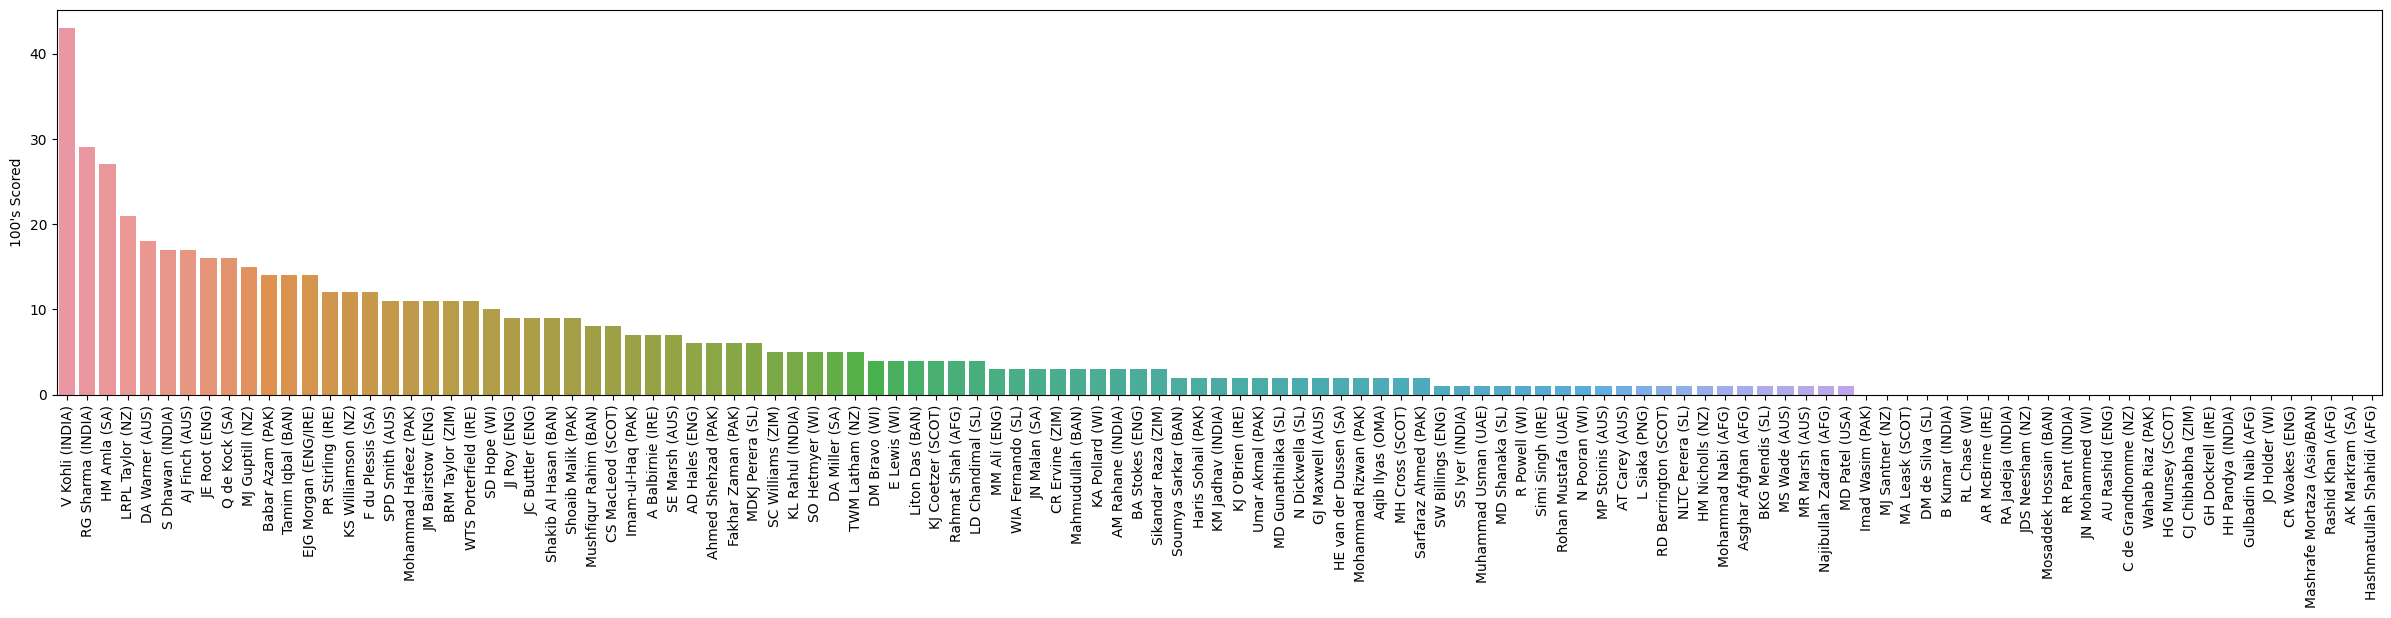

In [132]:
#100
plt.figure(figsize = (30,5))
r100 = df[['Player','100']].sort_values('100', ascending = False)
ax = sns.barplot(x='Player', y='100', data= r100)
ax.set(xlabel = '', ylabel= "100's Scored" )
plt.xticks(rotation=90)
plt.show()

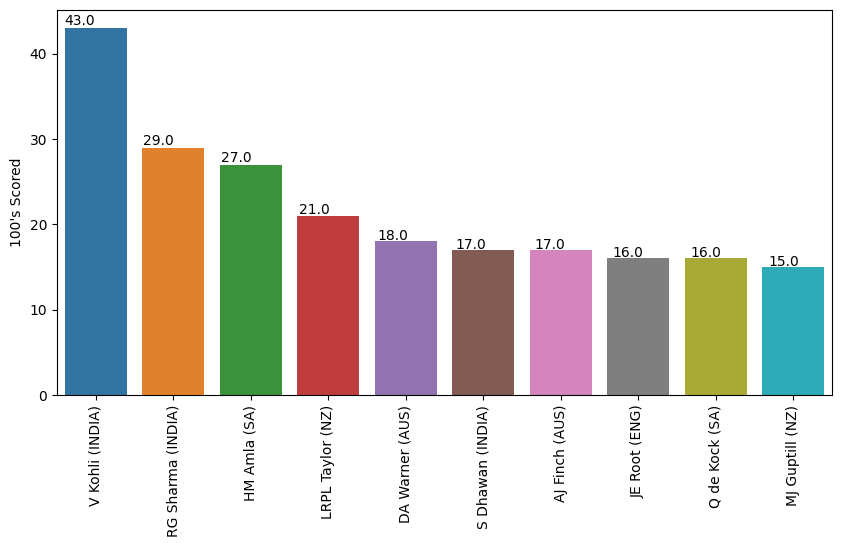

In [133]:
plt.figure(figsize = (10,5))
r100_top10 = df[['Player','100']].sort_values('100', ascending = False).head(10)
ax = sns.barplot(x='Player', y='100', data= r100_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= "100's Scored")
plt.xticks(rotation=90)
plt.show()

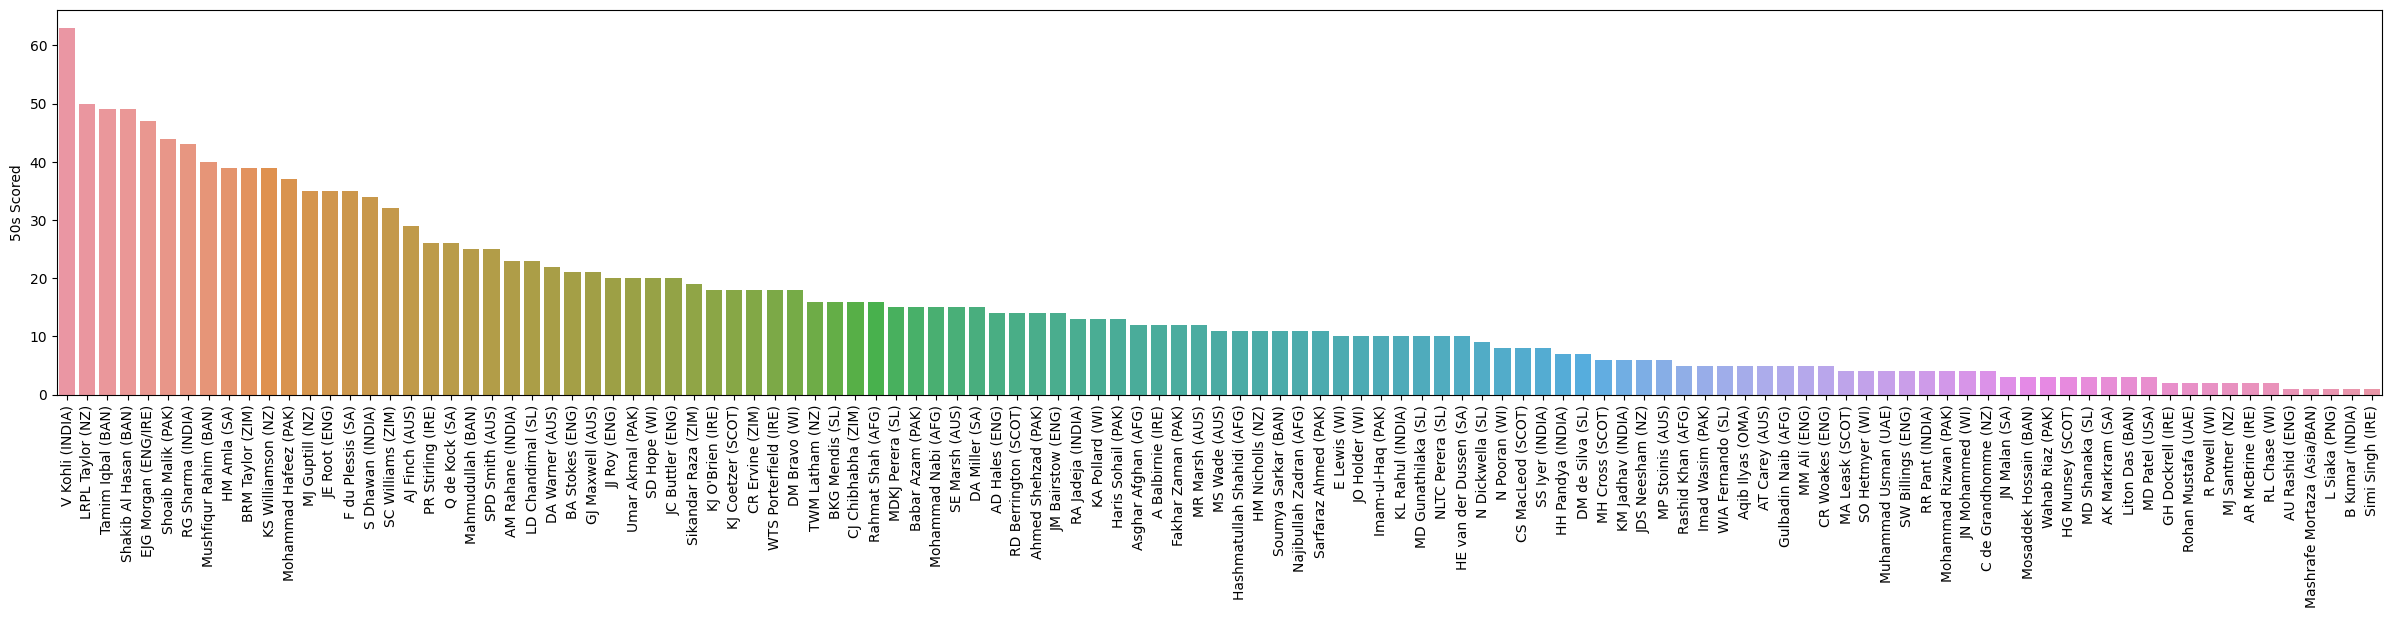

In [134]:
#50
plt.figure(figsize = (30,5))
r50 = df[['Player','50']].sort_values('50', ascending = False)
ax = sns.barplot(x='Player', y='50', data= r50)
ax.set(xlabel = '', ylabel= "50s Scored")
plt.xticks(rotation=90)
plt.show()

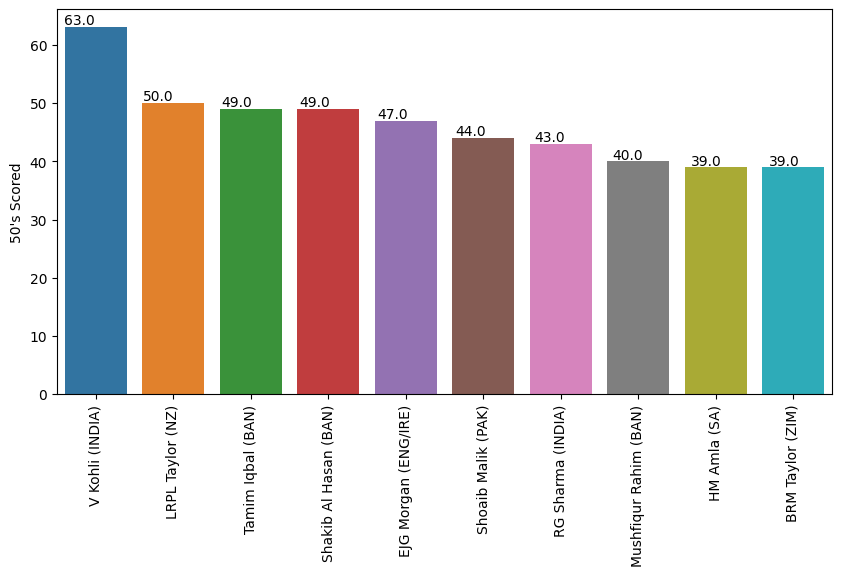

In [135]:
plt.figure(figsize = (10,5))
r50_top10 = df[['Player','50']].sort_values('50', ascending = False).head(10)
ax = sns.barplot(x='Player', y='50', data= r50_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= "50's Scored")
plt.xticks(rotation=90)
plt.show()

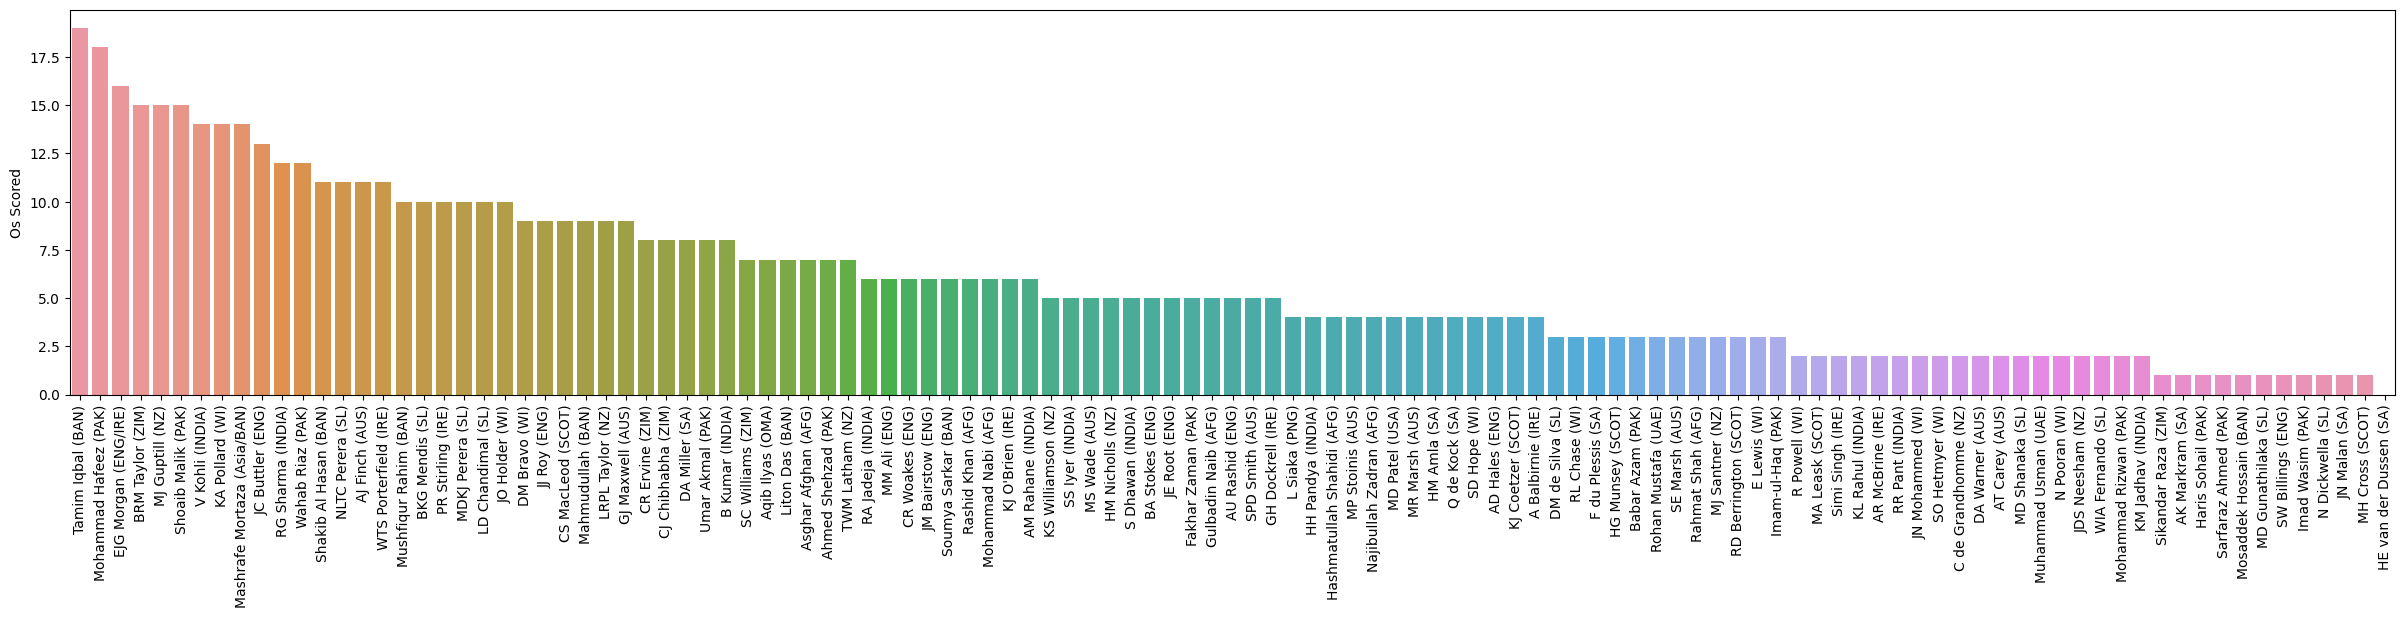

In [136]:
#0
plt.figure(figsize = (30,5))
r0 = df[['Player','0']].sort_values('0', ascending = False)
ax = sns.barplot(x='Player', y='0', data= r0)
ax.set(xlabel = '', ylabel= "Os Scored")
plt.xticks(rotation=90)
plt.show()

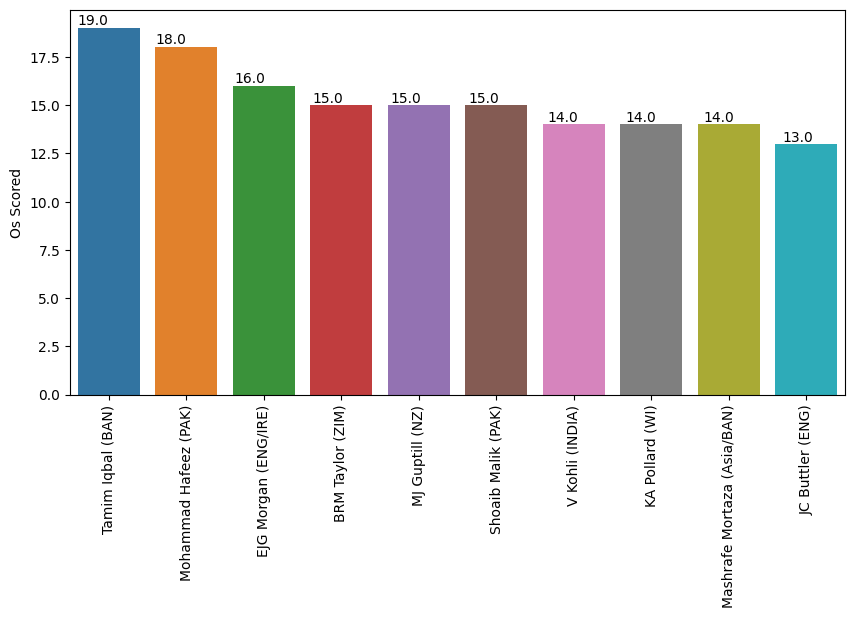

In [137]:
plt.figure(figsize = (10,5))
r0_top10 = df[['Player','0']].sort_values('0', ascending = False).head(10)
ax = sns.barplot(x='Player', y='0', data= r0_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= "Os Scored")
plt.xticks(rotation=90)
plt.show()

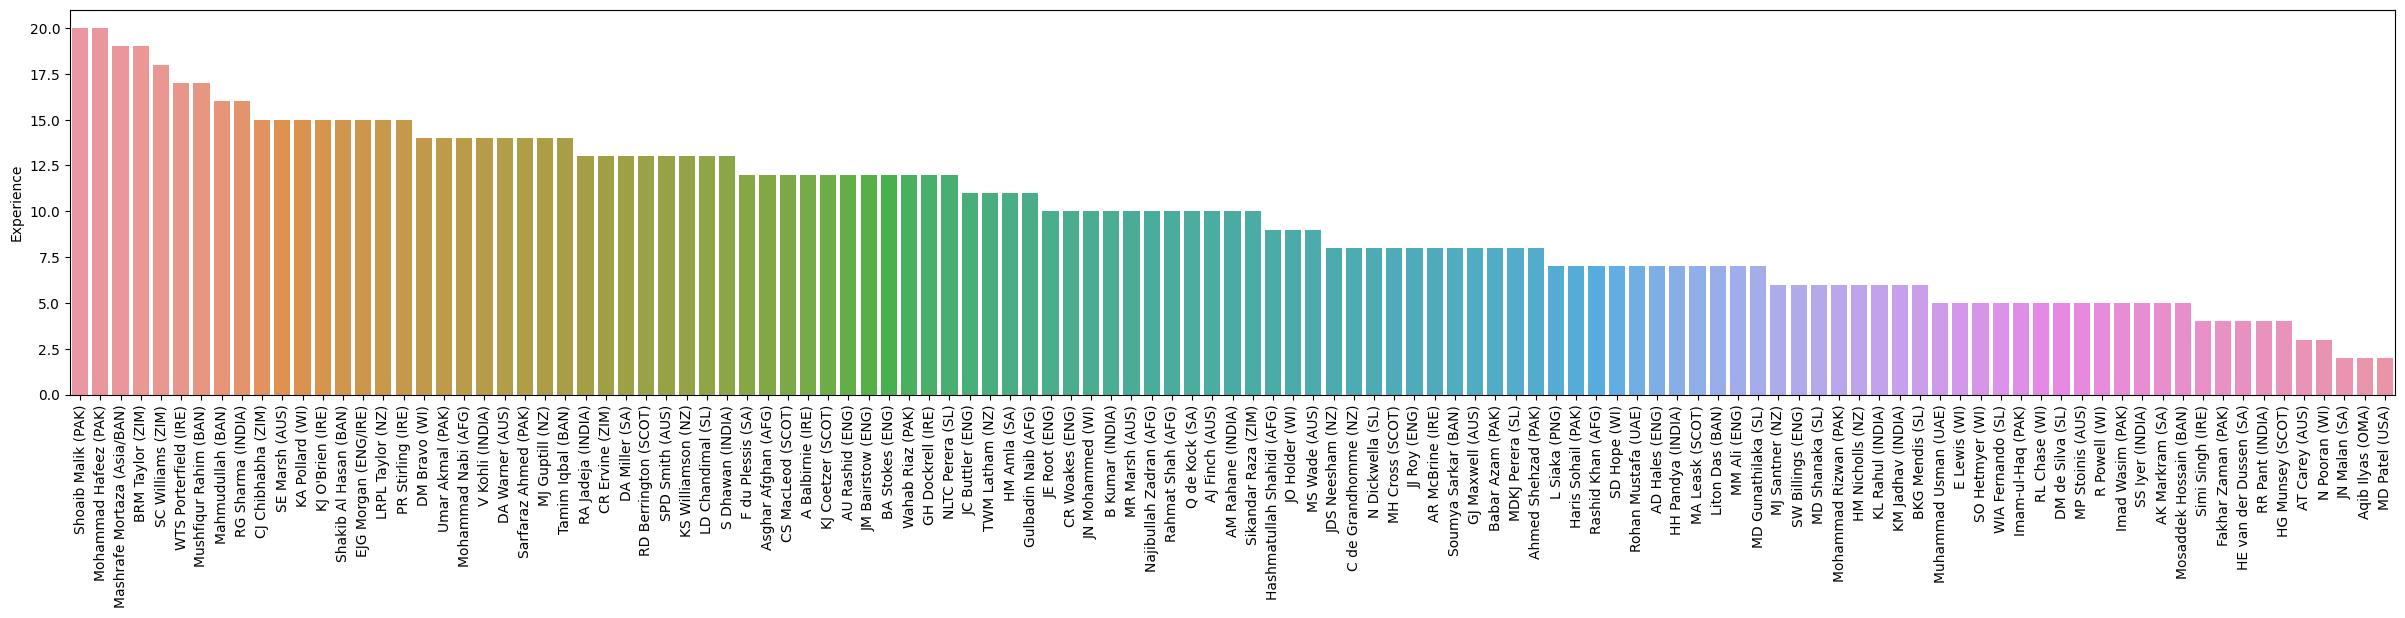

In [138]:
#Exp
plt.figure(figsize = (30,5))
exp = df[['Player','Exp']].sort_values('Exp', ascending = False)
ax = sns.barplot(x='Player', y='Exp', data= exp)
ax.set(xlabel = '', ylabel= 'Experience')
plt.xticks(rotation=90)
plt.show()

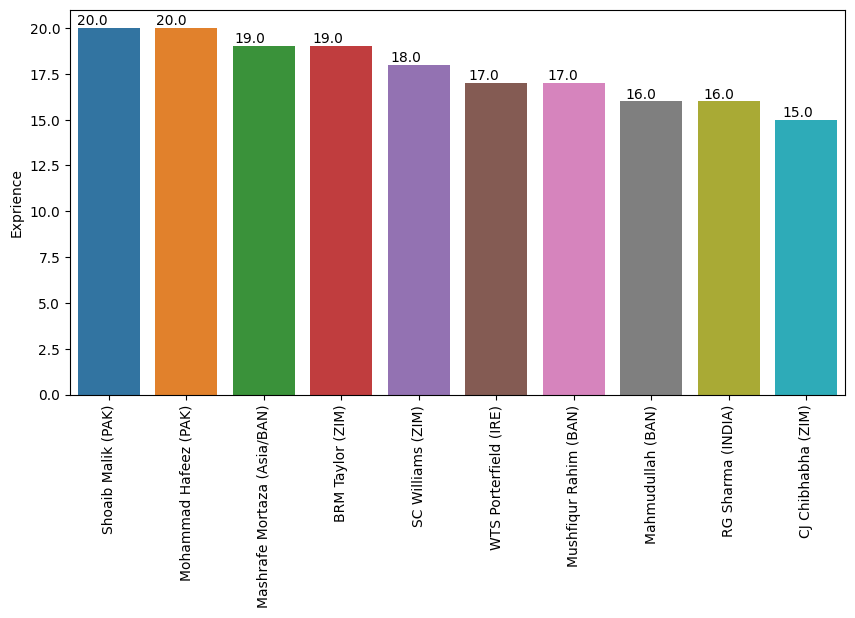

In [139]:
plt.figure(figsize = (10,5))
exp_top10 = df[['Player','Exp']].sort_values('Exp', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Exp', data= exp_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exprience')
plt.xticks(rotation=90)
plt.show()


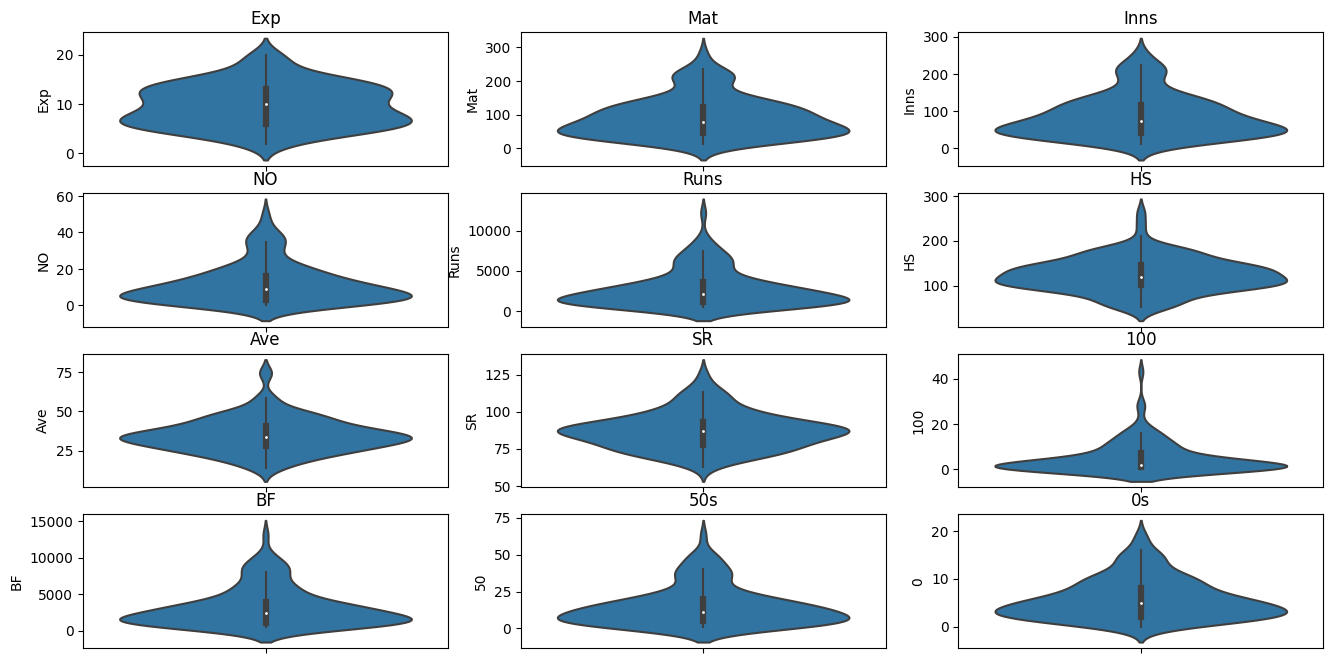

In [141]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [142]:
plt.figure(figsize = (30,10))
features=[ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100','50', '0', 'Exp']
#for i in enumerate(features):
    #plt.subplot(3,4,i[0]+1)
    #sns.distplot(df[i[1]])
   

<Figure size 3000x1000 with 0 Axes>

In [143]:
df_drop = df.copy()
player = df_drop.pop('Player')

In [144]:
df_drop.head()

Mat  Inns  NO   Runs   HS    Ave     BF     SR  100  50   0  Exp
0  249   245  37  12195  183  58.62  13084  93.20   43  63  14   14
1  220   216  30   9167  264  49.28  10295  89.04   29  43  12   16
2  218   209  36   8394  181  48.52  10065  83.39   21  50   9   15
3  175   173  12   8079  159  50.18   9128  88.50   27  39   4   11
4  235   225  31   7645  148  39.40   8367  91.37   14  47  16   15

In [145]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [146]:
Hopkins_score=round(hopkins(df_drop),2)

In [147]:
print("{} is a good Hopkins score for Clustering.".format(Hopkins_score))

0.93 is a good Hopkins score for Clustering.


In [148]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
df_scaled 

array([[ 2.61160442,  2.80798642,  2.35477165, ...,  3.61966943,
         1.96298951,  0.99371772],
       [ 2.12289941,  2.29415187,  1.70224456, ...,  2.10681468,
         1.48471876,  1.46111052],
       [ 2.08919562,  2.17012284,  2.26155349, ...,  2.63631385,
         0.76731264,  1.22741412],
       ...,
       [-1.07896102, -1.05463194, -0.72142746, ..., -1.0701803 ,
        -0.90663498, -1.34324625],
       [-0.97784964, -1.00147664, -0.44177299, ..., -0.84325208,
        -0.90663498, -0.64215706],
       [-1.26433189, -1.1963794 , -0.81464561, ..., -0.91889482,
        -0.42836424, -1.81063904]])

In [149]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

Mat      Inns        NO      Runs        HS       Ave        BF  \
0  2.611604  2.807986  2.354772  4.202619  1.558591  2.204641  3.752982   
1  2.122899  2.294152  1.702245  2.857140  3.701510  1.339576  2.694685   
2  2.089196  2.170123  2.261553  2.513661  1.505679  1.269185  2.607410   
3  1.364564  1.532259  0.024318  2.373692  0.923652  1.422933  2.251862   
4  2.375678  2.453618  1.795463  2.180846  0.632638  0.424495  1.963097   

         SR       100        50         0       Exp  
0  0.495567  5.538310  3.619669  1.962990  0.993718  
1  0.156247  3.494606  2.106815  1.484719  1.461111  
2 -0.304607  2.326775  2.636314  0.767313  1.227414  
3  0.112201  3.202648  1.804244 -0.428364  0.292629  
4  0.346299  1.304924  2.409386  2.441260  1.227414

C:\Users\Mohammed Minhaj Arif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammed Minhaj Arif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammed Minhaj Arif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammed Minhaj Arif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `

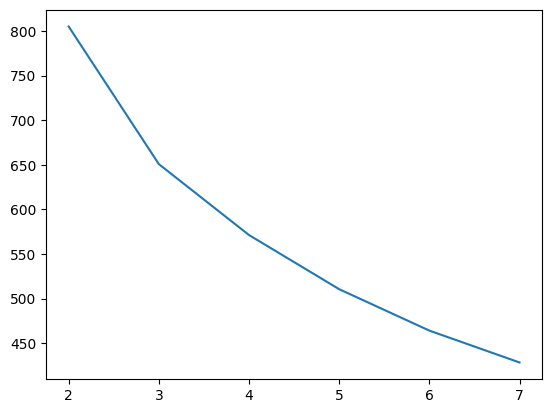

In [150]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [151]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.41887983355337266
For n_clusters=3, the silhouette score is 0.2719292391333079
For n_clusters=4, the silhouette score is 0.2353807431660637
For n_clusters=5, the silhouette score is 0.20568360616529108
For n_clusters=6, the silhouette score is 0.20900233154512513
For n_clusters=7, the silhouette score is 0.2254621605210078
For n_clusters=8, the silhouette score is 0.21961596642068207


C:\Users\Mohammed Minhaj Arif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammed Minhaj Arif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammed Minhaj Arif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammed Minhaj Arif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `

In [152]:

cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_df1)

C:\Users\Mohammed Minhaj Arif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=150, n_clusters=4, random_state=15)

In [153]:
KMeans(max_iter=150, n_clusters=4, random_state=15)

KMeans(max_iter=150, n_clusters=4, random_state=15)

In [154]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 2, 3, 3, 3])

In [155]:
df['Cluster_Id'] = cluster.labels_
df.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF     SR  100  \
0       V Kohli (INDIA)  249   245  37  12195  183  58.62  13084  93.20   43   
1     RG Sharma (INDIA)  220   216  30   9167  264  49.28  10295  89.04   29   
2      LRPL Taylor (NZ)  218   209  36   8394  181  48.52  10065  83.39   21   
3          HM Amla (SA)  175   173  12   8079  159  50.18   9128  88.50   27   
4  EJG Morgan (ENG/IRE)  235   225  31   7645  148  39.40   8367  91.37   14   

   50   0  Exp  Cluster_Id  
0  63  14   14           1  
1  43  12   16           1  
2  50   9   15           1  
3  39   4   11           1  
4  47  16   15           1

In [156]:
## Number of countries in each cluster
df.Cluster_Id.value_counts(ascending=True)

1    13
0    28
2    28
3    46
Name: Cluster_Id, dtype: int64

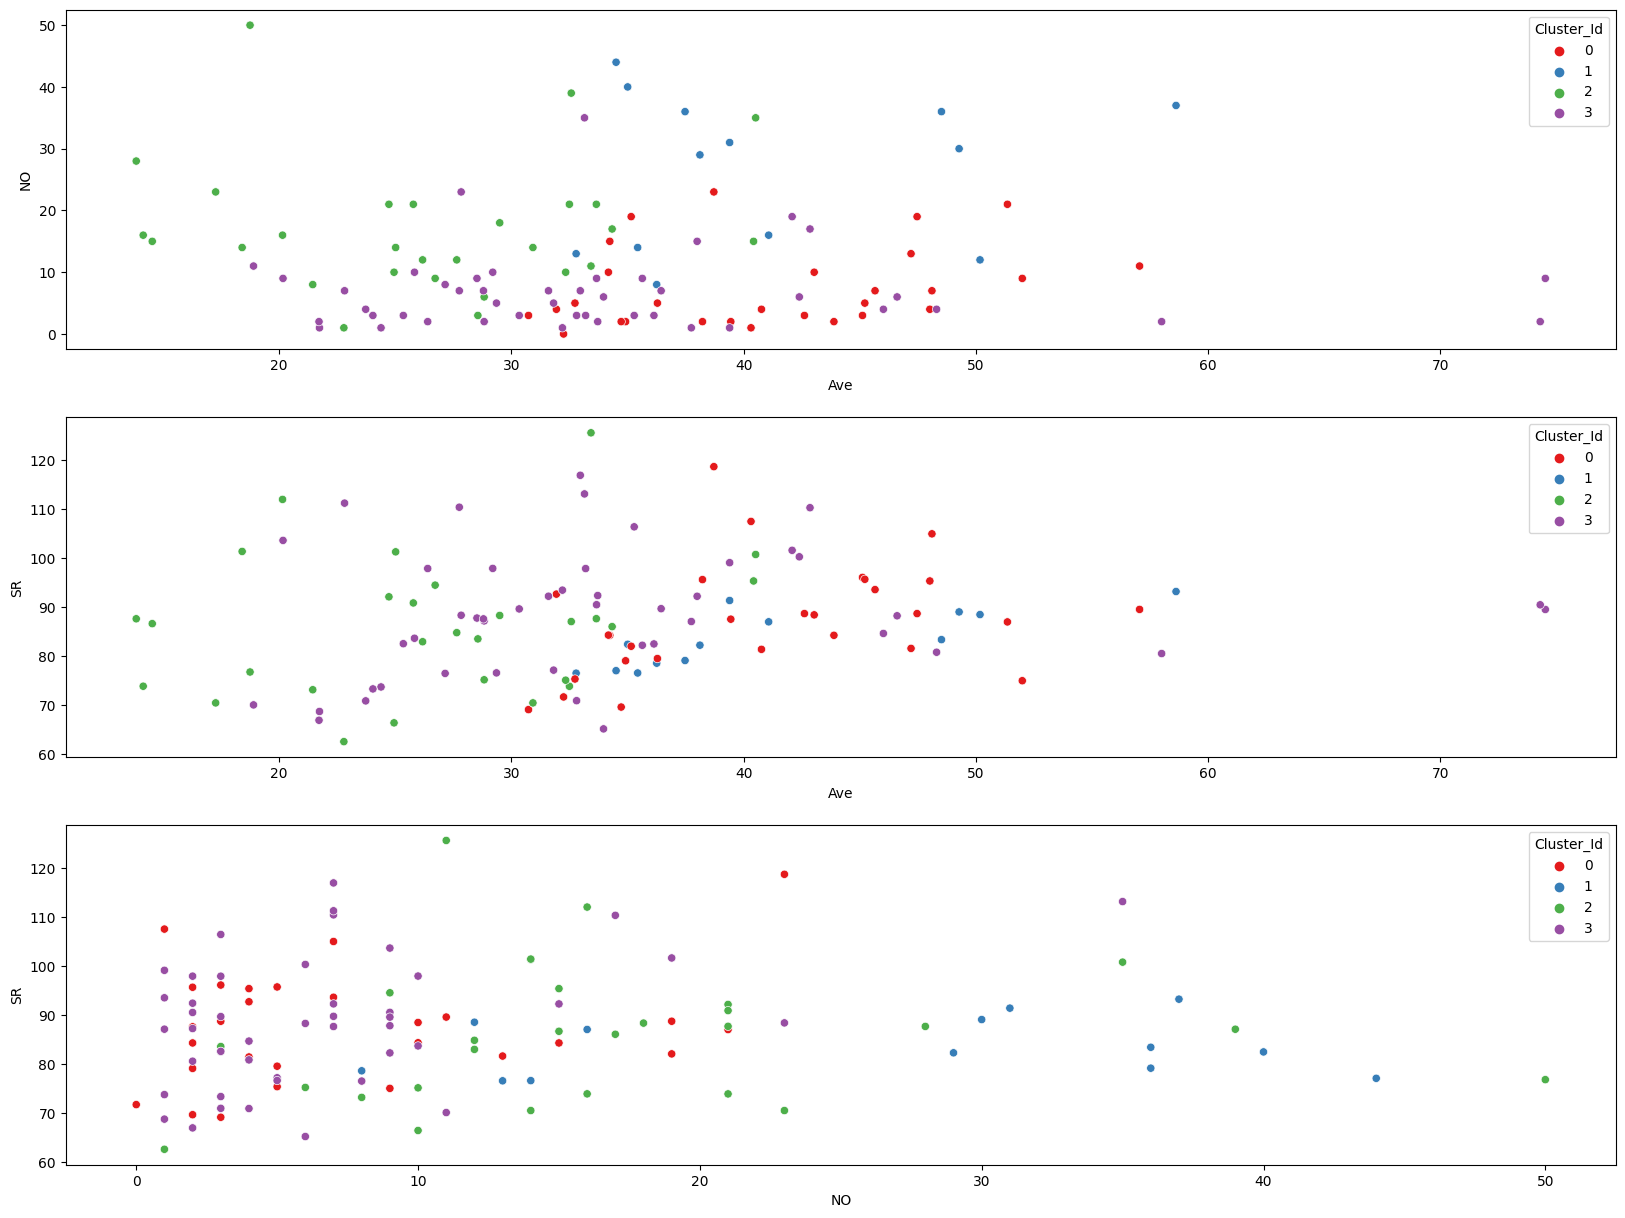

In [157]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Ave', y = 'NO',hue='Cluster_Id',data = df,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Ave', y = 'SR',hue='Cluster_Id', data = df,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'NO', y = 'SR',hue='Cluster_Id', data=df,legend='full',palette="Set1")
plt.show()

In [158]:
df[['NO','Ave','SR','Cluster_Id']].groupby('Cluster_Id').mean()

NO        Ave         SR
Cluster_Id                                 
0            7.535714  41.123214  87.407500
1           26.615385  41.283846  83.472308
2           17.142857  26.428929  85.947143
3            6.804348  34.256087  88.700870

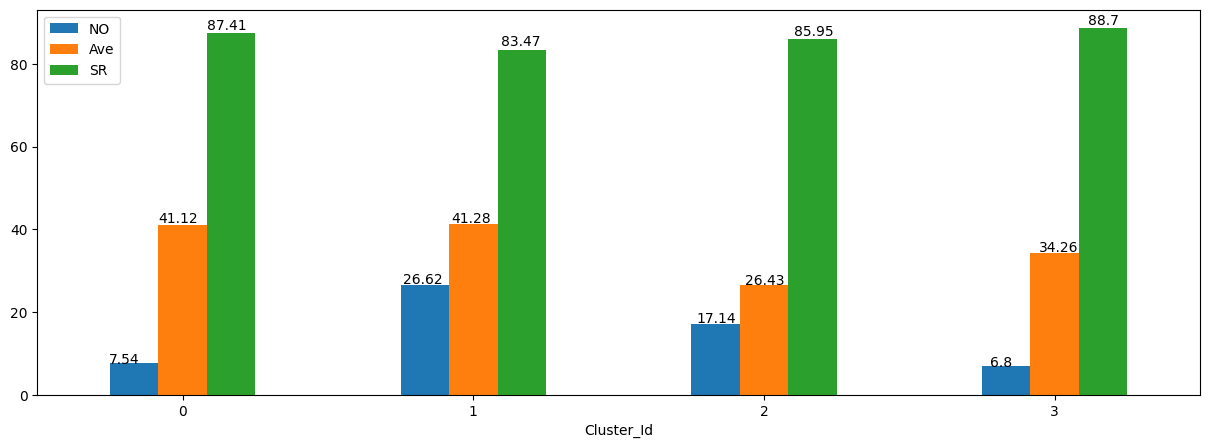

In [159]:
ax=df[['NO','Ave','SR','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=0)
plt.show();

In [160]:
df[df['Cluster_Id']==0].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()

Player  Mat  Inns  NO  Runs   HS    Ave    BF      SR  100  \
44  Ahmed Shehzad (PAK)   80    80   0  2580  124  32.25  3598   71.70    6   
28         JJ Roy (ENG)   92    91   1  3629  180  40.32  3376  107.49    9   
45    KJ Coetzer (SCOT)   60    60   2  2546  156  43.89  3021   84.27    4   
19    PR Stirling (IRE)  128   128   2  4971  177  39.45  5677   87.56   12   
49       AD Hales (ENG)   66    65   2  2409  171  38.23  2519   95.63    6   

    50   0  Exp  Cluster_Id  
44  14   7    8           0  
28  20   9    8           0  
45  18   4   12           0  
19  26  10   15           0  
49  14   4    7           0

In [161]:
df[df['Cluster_Id']==1].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Openers

Player  Mat  Inns  NO  Runs   HS    Ave    BF     SR  100  \
5       Tamim Iqbal (BAN)  215   215   8  7507  158  36.26  9551  78.59   14   
3            HM Amla (SA)  175   173  12  8079  159  50.18  9128  88.50   27   
11  Mohammad Hafeez (PAK)  213   211  13  6493  140  32.79  8481  76.55   11   
7        BRM Taylor (ZIM)  203   202  14  6664  145  35.44  8700  76.59   11   
8         MJ Guptill (NZ)  177   177  16  6614  237  41.08  7600  87.02   15   

    50   0  Exp  Cluster_Id  
5   49  19   14           1  
3   39   4   11           1  
11  37  18   20           1  
7   39  15   19           1  
8   35  15   14           1

In [162]:
df[df['Cluster_Id']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()

Player  Mat  Inns  NO  Runs   HS    Ave    BF     SR  100  \
51    CJ Chibhabha (ZIM)  105   105   1  2371   99  22.79  3788  62.59    0   
56       BKG Mendis (SL)   79    78   3  2142  119  28.56  2564  83.54    1   
57  RD Berrington (SCOT)   79    77   6  2047  101  28.83  2722  75.20    1   
84   Gulbadin Naib (AFG)   68    59   8  1094   82  21.45  1495  73.17    0   
43       KA Pollard (WI)  118   110   9  2699  119  26.72  2856  94.50    3   

    50   0  Exp  Cluster_Id  
51  16   8   15           2  
56  16  10    6           2  
57  14   3   13           2  
84   5   5   11           2  
43  13  14   15           2

In [163]:
df[df['Cluster_Id']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Hitters

Player  Mat  Inns  NO  Runs   HS    Ave    BF     SR  100  \
92      SS Iyer (INDIA)   24    23   1   867  103  39.40   875  99.08    1   
70  MD Gunathilaka (SL)   41    41   1  1510  133  37.75  1734  87.08    2   
69     N Dickwella (SL)   51    50   1  1578  116  32.20  1688  93.48    2   
80      MH Cross (SCOT)   54    52   1  1244  114  24.39  1687  73.74    2   
97  Rohan Mustafa (UAE)   39    36   1   761  109  21.74  1107  68.74    1   

    50  0  Exp  Cluster_Id  
92   8  5    5           3  
70  10  1    7           3  
69   9  1    8           3  
80   6  1    8           3  
97   2  3    7           3

In [164]:
#final List of Players who can appointed in a new team for Batsman role
FinalListbyKMean=df[df['Cluster_Id']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
FinalListbyKMean['Player']
FinalListbyKMean.reset_index(drop=True).Player[:]

0                SS Iyer (INDIA)
1            MD Gunathilaka (SL)
2               N Dickwella (SL)
3                MH Cross (SCOT)
4            Rohan Mustafa (UAE)
5                  JN Malan (SA)
6               Aqib Ilyas (OMA)
7              SW Billings (ENG)
8                AK Markram (SA)
9                MD Shanaka (SL)
10              JN Mohammed (WI)
11                  E Lewis (WI)
12               SO Hetmyer (WI)
13           Soumya Sarkar (BAN)
14                MD Patel (USA)
15               Liton Das (BAN)
16                 R Powell (WI)
17                 RL Chase (WI)
18             Imam-ul-Haq (PAK)
19            Haris Sohail (PAK)
20              Simi Singh (IRE)
21          Muhammad Usman (UAE)
22              HG Munsey (SCOT)
23              KL Rahul (INDIA)
24                 N Pooran (WI)
25    Hashmatullah Shahidi (AFG)
26                AT Carey (AUS)
27             HH Pandya (INDIA)
28              MP Stoinis (AUS)
29         Mohammad Rizwan (PAK)
30        

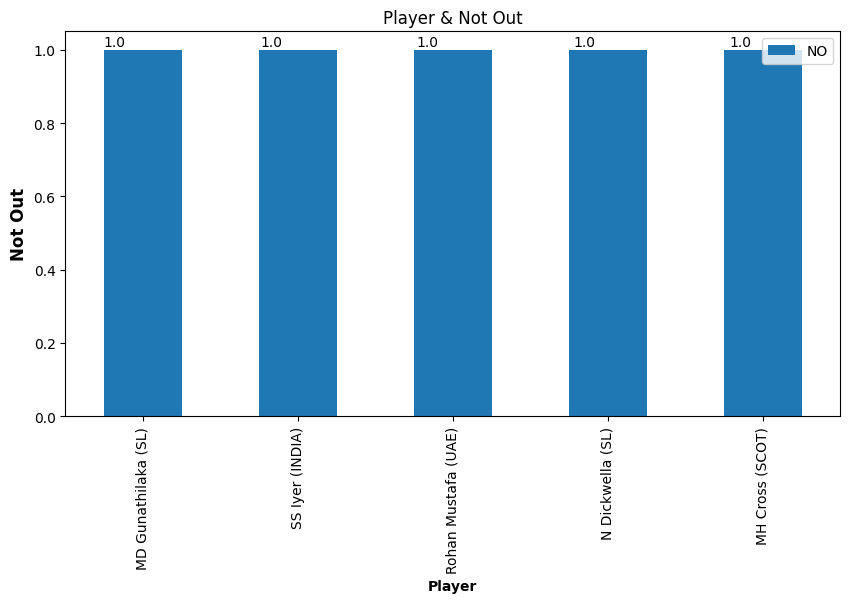

In [165]:
df_list_no = pd.DataFrame(FinalListbyKMean.groupby(['Player'])['NO'].mean().sort_values(ascending = True)).head()
ax=df_list_no.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Not Out')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Not Out", fontsize = 12, fontweight = 'bold')
plt.show()

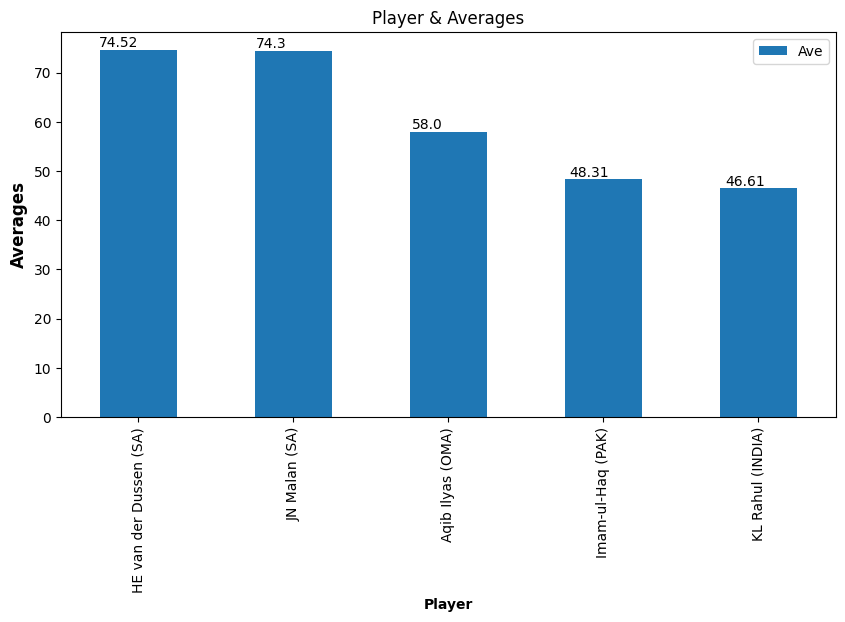

In [166]:
df_list_ave = pd.DataFrame(FinalListbyKMean.groupby(['Player'])['Ave'].mean().sort_values(ascending = False)).head()
ax=df_list_ave.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Averages')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Averages", fontsize = 12, fontweight = 'bold')
plt.show()

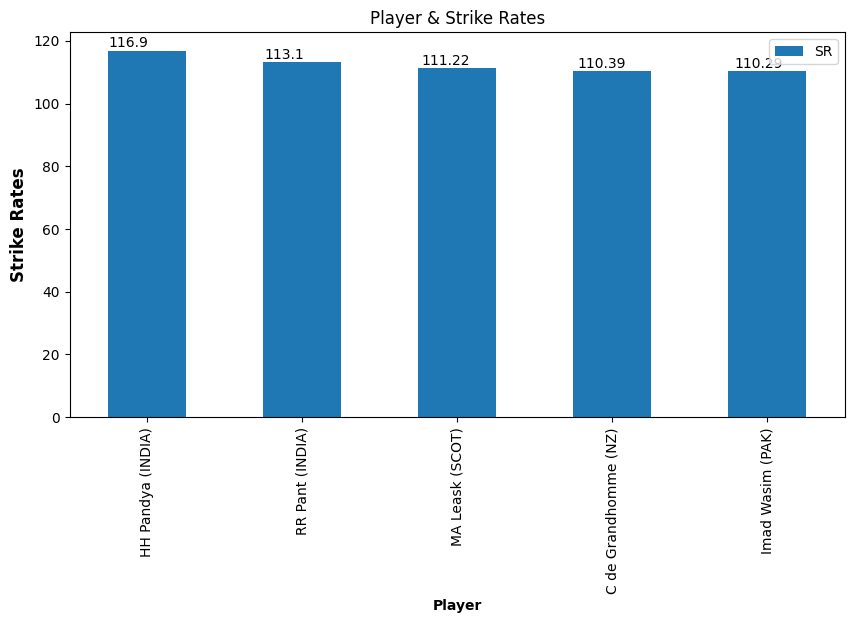

In [167]:
df_list_sr = pd.DataFrame(FinalListbyKMean.groupby(['Player'])['SR'].mean().sort_values(ascending = False)).head()
ax=df_list_sr.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Strike Rates')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Strike Rates", fontsize = 12, fontweight = 'bold')
plt.show()

In [168]:
df_hc = df.copy()
df_hc = df_hc.drop('Cluster_Id',axis=1)
df_hc.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF     SR  100  \
0       V Kohli (INDIA)  249   245  37  12195  183  58.62  13084  93.20   43   
1     RG Sharma (INDIA)  220   216  30   9167  264  49.28  10295  89.04   29   
2      LRPL Taylor (NZ)  218   209  36   8394  181  48.52  10065  83.39   21   
3          HM Amla (SA)  175   173  12   8079  159  50.18   9128  88.50   27   
4  EJG Morgan (ENG/IRE)  235   225  31   7645  148  39.40   8367  91.37   14   

   50   0  Exp  
0  63  14   14  
1  43  12   16  
2  50   9   15  
3  39   4   11  
4  47  16   15

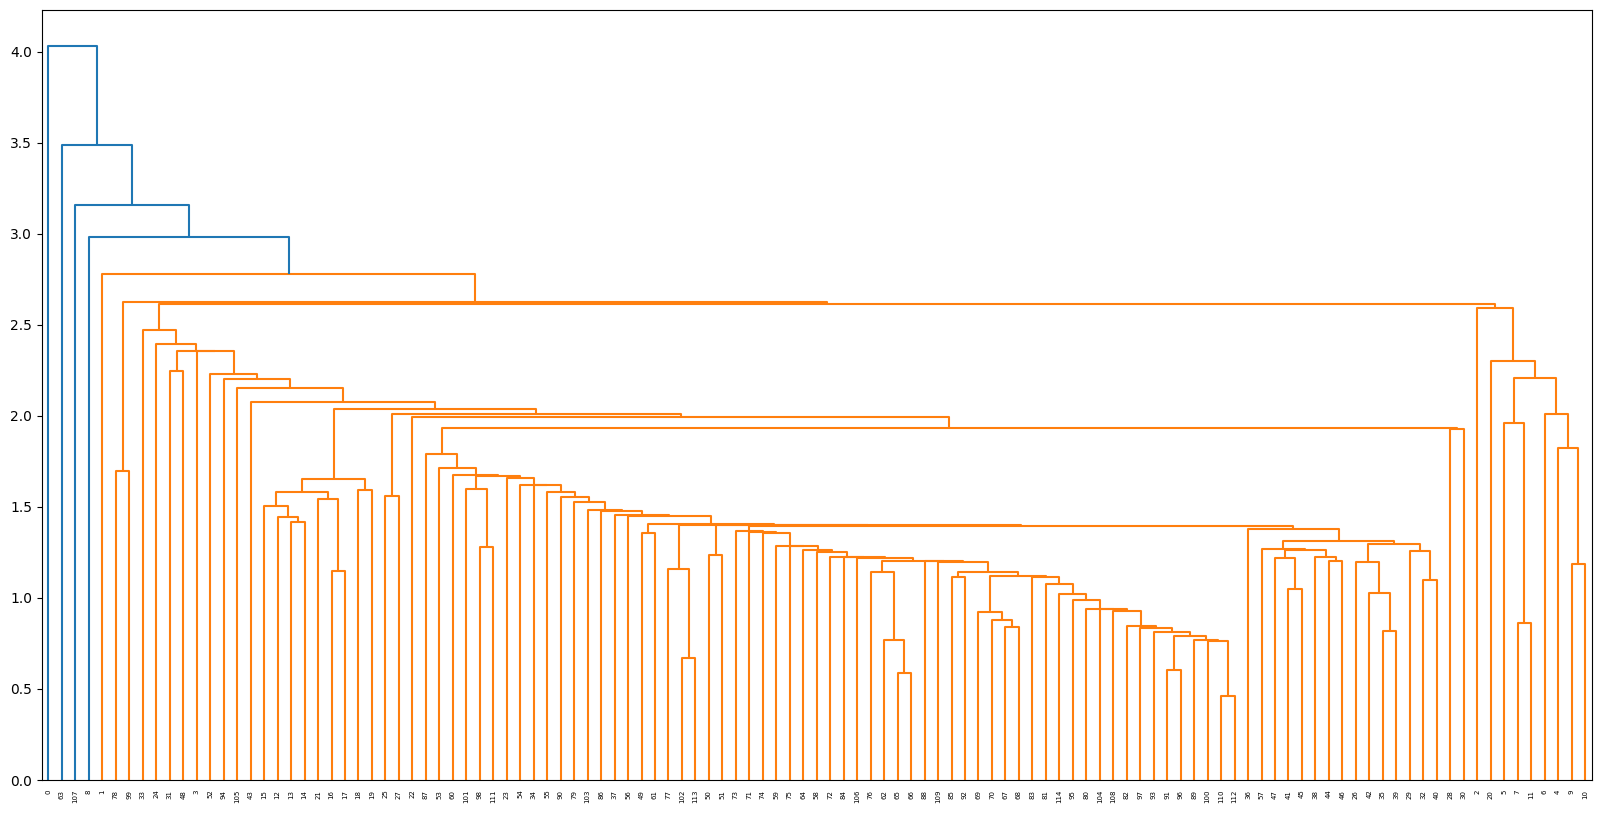

In [169]:
# Single linkage
plt.figure(figsize = (20,10))
mergings = linkage(df_df1, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

In [170]:
df_hc = df.copy()
df_hc = df_hc.drop('Cluster_Id',axis=1)
df_hc.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF     SR  100  \
0       V Kohli (INDIA)  249   245  37  12195  183  58.62  13084  93.20   43   
1     RG Sharma (INDIA)  220   216  30   9167  264  49.28  10295  89.04   29   
2      LRPL Taylor (NZ)  218   209  36   8394  181  48.52  10065  83.39   21   
3          HM Amla (SA)  175   173  12   8079  159  50.18   9128  88.50   27   
4  EJG Morgan (ENG/IRE)  235   225  31   7645  148  39.40   8367  91.37   14   

   50   0  Exp  
0  63  14   14  
1  43  12   16  
2  50   9   15  
3  39   4   11  
4  47  16   15

In [171]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1])

In [172]:
# assign cluster labels
df_hc['Cluster_labels'] = cluster_labels
df_hc.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF     SR  100  \
0       V Kohli (INDIA)  249   245  37  12195  183  58.62  13084  93.20   43   
1     RG Sharma (INDIA)  220   216  30   9167  264  49.28  10295  89.04   29   
2      LRPL Taylor (NZ)  218   209  36   8394  181  48.52  10065  83.39   21   
3          HM Amla (SA)  175   173  12   8079  159  50.18   9128  88.50   27   
4  EJG Morgan (ENG/IRE)  235   225  31   7645  148  39.40   8367  91.37   14   

   50   0  Exp  Cluster_labels  
0  63  14   14               0  
1  43  12   16               1  
2  50   9   15               1  
3  39   4   11               1  
4  47  16   15               1

In [173]:
## Number of countries in each cluster
df_hc.Cluster_labels.value_counts(ascending=True)

0      1
2      1
3      1
1    112
Name: Cluster_labels, dtype: int64

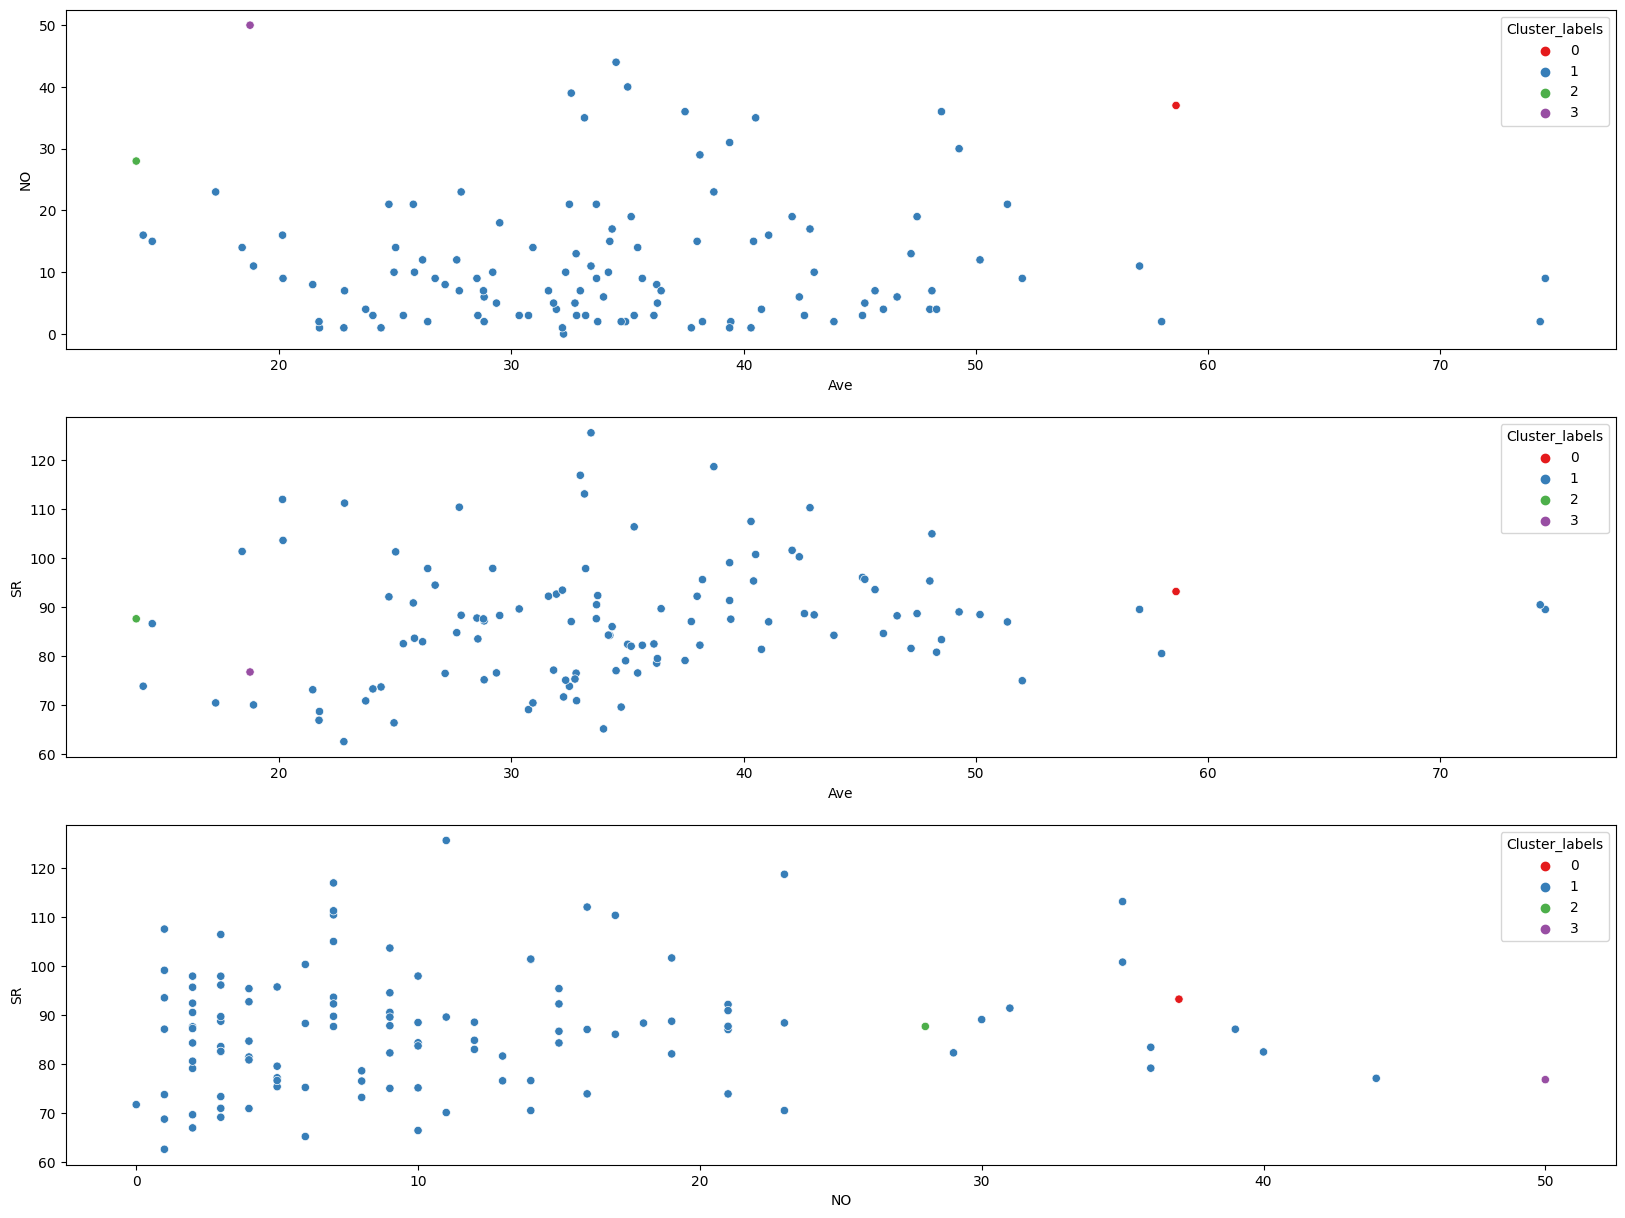

In [174]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Ave', y = 'NO',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Ave', y = 'SR',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'NO', y = 'SR',hue='Cluster_labels', data=df_hc,legend='full',palette="Set1")
plt.show()

In [175]:
df_hc[['NO','Ave','SR','Cluster_labels']].groupby('Cluster_labels').mean()

NO        Ave         SR
Cluster_labels                                 
0               37.000000  58.620000  93.200000
1               11.026786  34.934911  87.157857
2               28.000000  13.850000  87.640000
3               50.000000  18.750000  76.790000

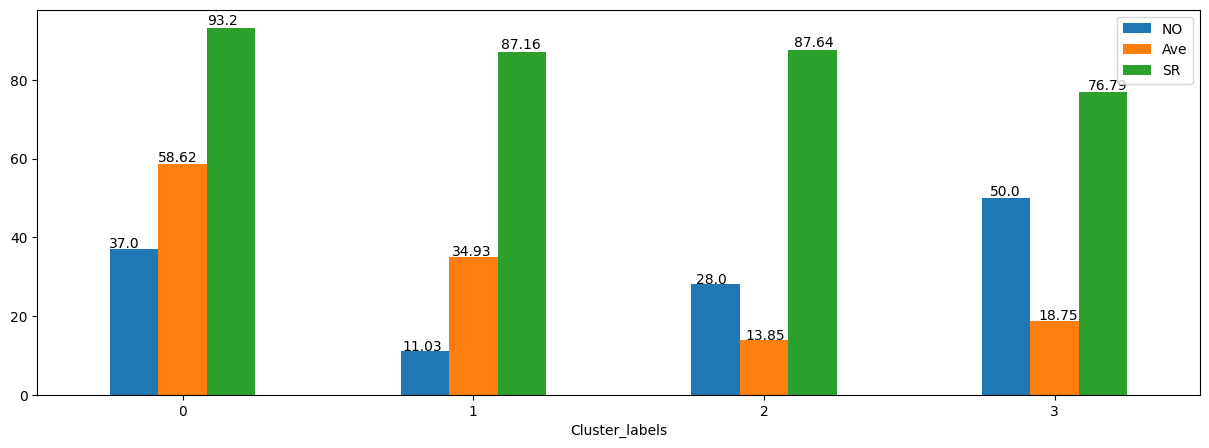

In [176]:
ax=df_hc[['NO','Ave','SR','Cluster_labels']].groupby('Cluster_labels').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=0)
plt.show();

In [177]:
df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF    SR  100  50  \
0  V Kohli (INDIA)  249   245  37  12195  183  58.62  13084  93.2   43  63   

    0  Exp  Cluster_labels  
0  14   14               0

In [178]:
df_hc[df_hc['Cluster_labels']==1].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#MiddleOrders 

Player  Mat  Inns  NO  Runs   HS    Ave    BF      SR  100  \
44  Ahmed Shehzad (PAK)   80    80   0  2580  124  32.25  3598   71.70    6   
28         JJ Roy (ENG)   92    91   1  3629  180  40.32  3376  107.49    9   
92      SS Iyer (INDIA)   24    23   1   867  103  39.40   875   99.08    1   
70  MD Gunathilaka (SL)   41    41   1  1510  133  37.75  1734   87.08    2   
69     N Dickwella (SL)   51    50   1  1578  116  32.20  1688   93.48    2   

    50  0  Exp  Cluster_labels  
44  14  7    8               1  
28  20  9    8               1  
92   8  5    5               1  
70  10  1    7               1  
69   9  1    8               1

In [179]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Hitters

Player  Mat  Inns  NO  Runs  HS    Ave    BF     SR  \
63  Mashrafe Mortaza (Asia/BAN)  217   157  28  1787  51  13.85  2039  87.64   

    100  50   0  Exp  Cluster_labels  
63    0   1  14   19               2

In [180]:
df_hc[df_hc['Cluster_labels']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Hitters

Player  Mat  Inns  NO  Runs   HS    Ave   BF     SR  100  50  0  \
107  L Siaka (PNG)   33    33  50   619  109  18.75  806  76.79    1   1  4   

     Exp  Cluster_labels  
107    7               3

In [181]:

FinalListbyHC=df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
FinalListbyHC['Player']
FinalListbyHC.reset_index(drop=True).Player[:]

0    Mashrafe Mortaza (Asia/BAN)
Name: Player, dtype: object

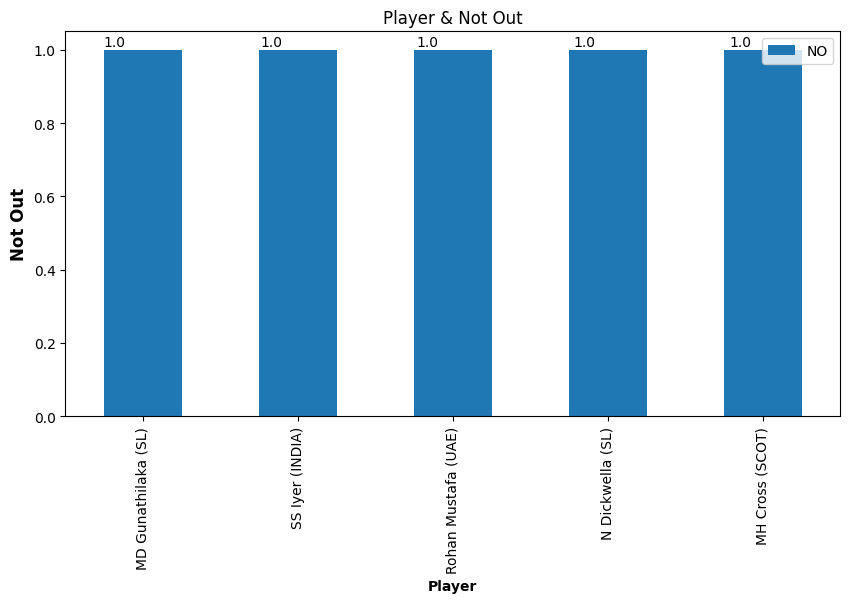

In [182]:
df_list_hc = pd.DataFrame(FinalListbyHC.groupby(['Player'])['NO'].mean().sort_values(ascending = True)).head()
ax=df_list_no.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Not Out')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Not Out", fontsize = 12, fontweight = 'bold')
plt.show()

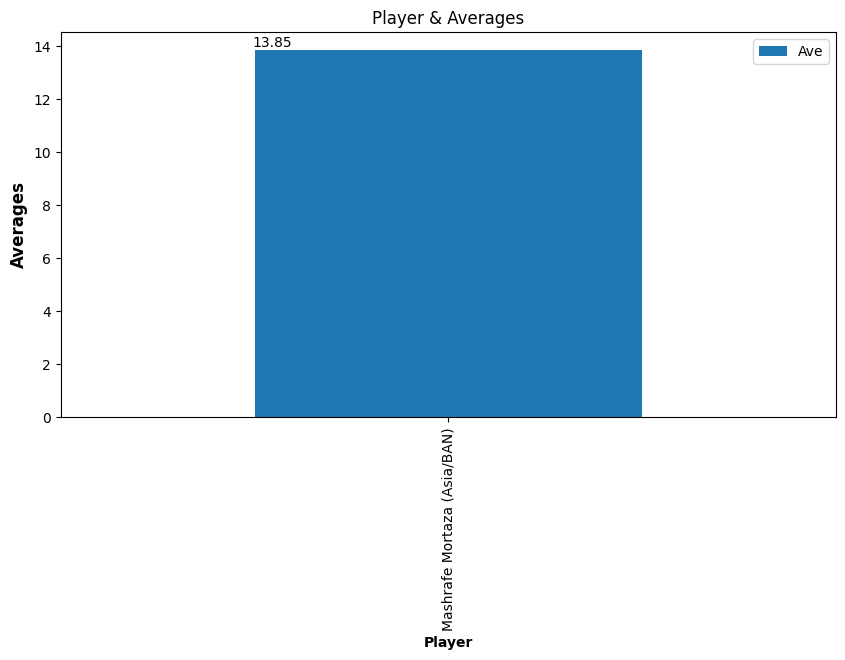

In [183]:

df_list_ave = pd.DataFrame(FinalListbyHC.groupby(['Player'])['Ave'].mean().sort_values(ascending = False)).head()
ax=df_list_ave.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Averages')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Averages", fontsize = 12, fontweight = 'bold')
plt.show()

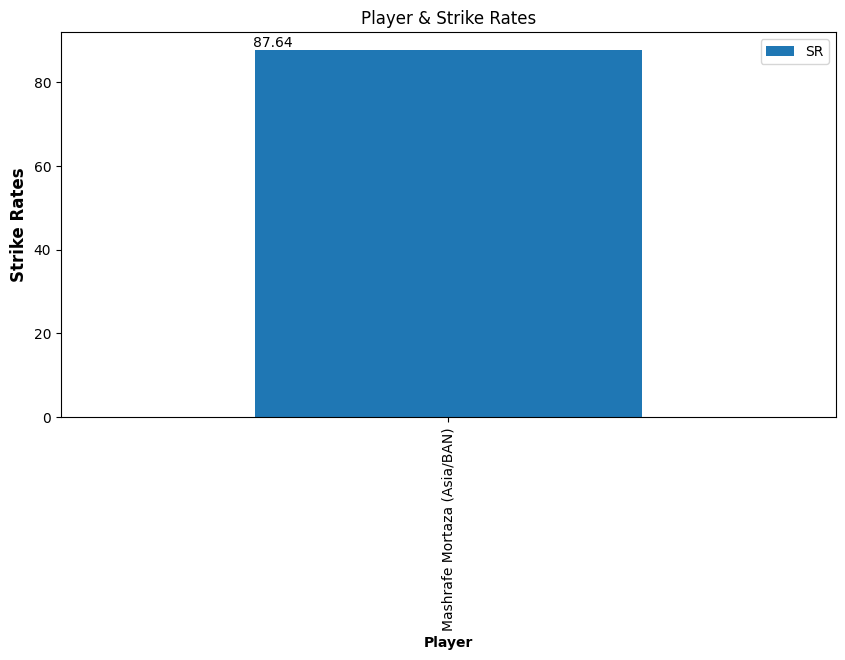

In [184]:
df_list_sr = pd.DataFrame(FinalListbyHC.groupby(['Player'])['SR'].mean().sort_values(ascending = False)).head()
ax=df_list_sr.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Strike Rates')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Strike Rates", fontsize = 12, fontweight = 'bold')
plt.show()

In [185]:
df.Cluster_Id.value_counts(ascending=True)

1    13
0    28
2    28
3    46
Name: Cluster_Id, dtype: int64

In [186]:
FinalListbyKMean=df[df['Cluster_Id']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
FinalListbyKMean['Player']
FinalListbyKMean.reset_index(drop=True).Player[:5]

0        SS Iyer (INDIA)
1    MD Gunathilaka (SL)
2       N Dickwella (SL)
3        MH Cross (SCOT)
4    Rohan Mustafa (UAE)
Name: Player, dtype: object

In [187]:
FinalListbyKMean.reset_index(drop=True).Player[:5]

0        SS Iyer (INDIA)
1    MD Gunathilaka (SL)
2       N Dickwella (SL)
3        MH Cross (SCOT)
4    Rohan Mustafa (UAE)
Name: Player, dtype: object

In [188]:
FinalListbyHC.reset_index(drop=True).Player[:5]

0    Mashrafe Mortaza (Asia/BAN)
Name: Player, dtype: object

In [189]:

FinalListbyKMean.reset_index(drop=True).Player[:5]

0        SS Iyer (INDIA)
1    MD Gunathilaka (SL)
2       N Dickwella (SL)
3        MH Cross (SCOT)
4    Rohan Mustafa (UAE)
Name: Player, dtype: object